## Importing and prepping data

In [1]:
import pandas as pd
import numpy as np
import diff_classifier.aws as aws
import diff_classifier.pca as pca

In [2]:
features = []
remote_folder = 'Tissue_Studies/09_11_18_Regional'
bucket = 'ccurtis.data'

vids = 15
types = ['PEG', 'PS']
pups = [2, 3]
slices = [1, 2, 3]
counter = 0
for typ in types:
    for pup in pups:
        for slic in slices:
            for num in range(1, vids+1):
                try:
                    #to_track.append('100x_0_4_1_2_gel_{}_bulk_vid_{}'.format(vis, num))
                    #to_track.append('{}_P{}_S{}_XY{}'.format(typ, pup, slic, '%02d' % num))
                    filename = 'features_{}_P{}_S{}_XY{}.csv'.format(typ, pup, slic, '%02d' % num)
                    aws.download_s3('{}/{}'.format(remote_folder, filename), filename, bucket_name=bucket)
                    fstats = pd.read_csv(filename, encoding = "ISO-8859-1", index_col='Unnamed: 0')
                    fstats['Particle Type'] = pd.Series(fstats.shape[0]*[typ], index=fstats.index)
                    fstats['Video Number'] = pd.Series(fstats.shape[0]*[num], index=fstats.index)
                    fstats['Slices'] = pd.Series(fstats.shape[0]*[str(slic)], index=fstats.index)
                    fstats['Pup'] = pd.Series(fstats.shape[0]*[str(pup)], index=fstats.index)
                    if num in range(1, 6):
                        fstats['Region'] = pd.Series(fstats.shape[0]*['Cortex'], index=fstats.index)
                        fstats['Region and Type'] = pd.Series(fstats.shape[0]*['{}_Cortex'.format(typ)], index=fstats.index)
                    elif num in range(6, 11):
                        fstats['Region'] = pd.Series(fstats.shape[0]*['Hippocampus'], index=fstats.index)
                        fstats['Region and Type'] = pd.Series(fstats.shape[0]*['{}_Hippocampus'.format(typ)], index=fstats.index)
                    else:
                        fstats['Region'] = pd.Series(fstats.shape[0]*['Thalamus'], index=fstats.index)
                        fstats['Region and Type'] = pd.Series(fstats.shape[0]*['{}_Thalamus'.format(typ)], index=fstats.index)
                    #print(num)
                    print(filename)
                    counter = counter + 1
                    if counter == 1:
                        fstats_tot = fstats
                    else:
                        fstats_tot = fstats_tot.append(fstats, ignore_index=True)
                except:
                    print('skipped filename: {}'.format(filename))

features_PEG_P2_S1_XY01.csv
features_PEG_P2_S1_XY02.csv
features_PEG_P2_S1_XY03.csv
features_PEG_P2_S1_XY04.csv
features_PEG_P2_S1_XY05.csv
features_PEG_P2_S1_XY06.csv
features_PEG_P2_S1_XY07.csv
features_PEG_P2_S1_XY08.csv
features_PEG_P2_S1_XY09.csv
features_PEG_P2_S1_XY10.csv
features_PEG_P2_S1_XY11.csv
features_PEG_P2_S1_XY12.csv
features_PEG_P2_S1_XY13.csv
features_PEG_P2_S1_XY14.csv
features_PEG_P2_S1_XY15.csv
features_PEG_P2_S2_XY01.csv
features_PEG_P2_S2_XY02.csv
features_PEG_P2_S2_XY03.csv
features_PEG_P2_S2_XY04.csv
features_PEG_P2_S2_XY05.csv
features_PEG_P2_S2_XY06.csv
features_PEG_P2_S2_XY07.csv
features_PEG_P2_S2_XY08.csv
features_PEG_P2_S2_XY09.csv
features_PEG_P2_S2_XY10.csv
features_PEG_P2_S2_XY11.csv
skipped filename: features_PEG_P2_S2_XY12.csv
skipped filename: features_PEG_P2_S2_XY13.csv
features_PEG_P2_S2_XY14.csv
features_PEG_P2_S2_XY15.csv
features_PEG_P2_S3_XY01.csv
features_PEG_P2_S3_XY02.csv
features_PEG_P2_S3_XY03.csv
features_PEG_P2_S3_XY04.csv
features_PEG

In [5]:
fstats_tot['LogDeff1'] = np.log(fstats_tot.Deff1).replace([np.inf, -np.inf], np.nan)

/home/ubuntu/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


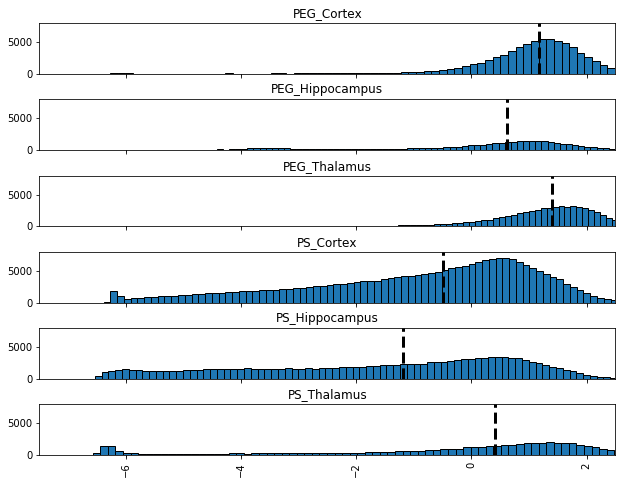

In [26]:
axes = fstats_tot.hist(column='LogDeff1', by='Region and Type', layout=(6, 1), bins=100, sharex=True, sharey=True,
                        figsize=(10, 8), edgecolor='k')

means = []
types2 = ['PEG_Cortex', 'PEG_Hippocampus', 'PEG_Thalamus', 'PS_Cortex', 'PS_Hippocampus', 'PS_Thalamus']
for ax, typ in zip(axes, types2):
    ax.set_ylim([0,8000])
    #ax.set_xscale("log", nonposx='clip')
    ax.set_xlim([-7.5,2.5])
    means.append(fstats_tot[fstats_tot['Region and Type']==typ]['LogDeff1'].median())
    ax.axvline(fstats_tot[fstats_tot['Region and Type']==typ]['LogDeff1'].median(), color='k', linestyle='dashed', linewidth=3)

In [27]:
meanD = np.array(means)
meanD.sort()
Dbins = meanD[0:-1] + np.diff(meanD)/2
print(Dbins)

[-0.84215657 -0.03675379  0.51583287  0.89070295  1.28647828]


(-7.5, 2.5)

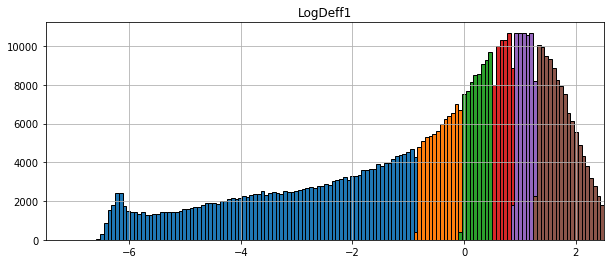

In [32]:
import matplotlib.pyplot as plt
Dbins = [-10, -0.842, -0.037, 0.516, 0.891, 1.29, 10]
bins = np.linspace(-10, 10, 300)
fig, ax = plt.subplots(figsize=(10, 4))
for i in range(6):
    fstats_tot[(fstats_tot['Particle Type']=='PEG'(Dbins[i] < fstats_tot['LogDeff1']) & (fstats_tot['LogDeff1'] < Dbins[i+1])].hist(column='LogDeff1', bins=bins, figsize=(4, 8), edgecolor='k', ax=ax)
ax.set_xlim([-7.5, 2.5])

In [33]:
from sklearn.metrics import classification_report
y_pred2 = list(pd.cut(fstats_tot.LogDeff1, bins=Dbins, labels=types2).astype(str))
y_true = fstats_tot['Region and Type'].tolist()
print(classification_report(y_true, y_pred2, digits=4))

                 precision    recall  f1-score   support

     PEG_Cortex     0.0185    0.0522    0.0273     74240
PEG_Hippocampus     0.0483    0.1005    0.0652     34051
   PEG_Thalamus     0.0753    0.0898    0.0819     59388
      PS_Cortex     0.3736    0.0946    0.1509    229678
 PS_Hippocampus     0.1419    0.0629    0.0871    142563
    PS_Thalamus     0.1268    0.2867    0.1758     53595
            nan     0.0000    0.0000    0.0000         0

    avg / total     0.2028    0.0989    0.1106    593515



/home/ubuntu/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [4]:
fstats_tot['LogMeanDeff1'] = np.log(fstats_tot['Mean Deff1']).replace([np.inf, -np.inf], np.nan)

/home/ubuntu/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


In [9]:
meanD = np.array(means)
meanD.sort()
Dbins = meanD[0:-1] + np.diff(meanD)/2
print(Dbins)

[-0.07646183  0.42426154  0.77000405  1.09084526  1.42649009]


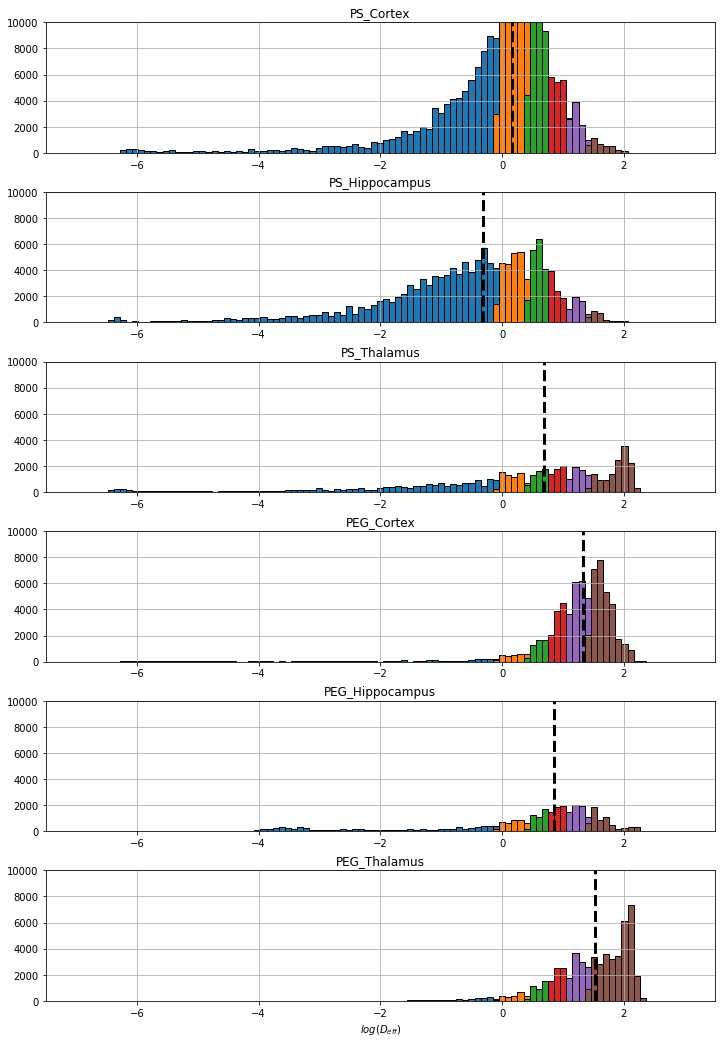

In [12]:
import matplotlib.pyplot as plt
Dbins = [-10, -0.0765, 0.424, 0.77, 1.091, 1.426, 10]
bins = np.linspace(-10, 10, 200)
fig, axes = plt.subplots(nrows=6, figsize=(12, 18))
counter = 0
means = []
typereg = ['PS_Cortex', 'PS_Hippocampus', 'PS_Thalamus', 'PEG_Cortex', 'PEG_Hippocampus', 'PEG_Thalamus']
for ax in axes:
    means.append(fstats_tot[fstats_tot['Region and Type']==typereg[counter]]['LogMeanDeff1'].median())
    for i in range(6):
        fstats_tot[(fstats_tot['Region and Type']==typereg[counter]) & (Dbins[i] < fstats_tot['LogMeanDeff1']) & (fstats_tot['LogMeanDeff1'] < Dbins[i+1])].hist(column='LogMeanDeff1', bins=bins, figsize=(12,3), edgecolor='k', ax=ax, )
        ax.set_xlim([-7.5, 3.5])
        ax.set_ylim([0, 10000])
    ax.axvline(fstats_tot[fstats_tot['Region and Type']==typereg[counter]]['LogMeanDeff1'].median(), color='k', linestyle='dashed', linewidth=3)
    ax.set_title(typereg[counter])
    if counter == 5:
        ax.set_xlabel(r'$log(D_{eff})$')
    counter = counter + 1

In [13]:
types = ['PS_Hippocampus', 'PS_Cortex', 'PS_Thalamus', 'PEG_Hippocampus', 'PEG_Cortex', 'PEG_Thalamus']
y_pred2 = list(pd.cut(fstats_tot.LogMeanDeff1, bins=Dbins, labels=types).astype(str))
y_true = fstats_tot['Region and Type'].tolist()
print(classification_report(y_true, y_pred2, digits=4))

                 precision    recall  f1-score   support

     PEG_Cortex     0.3528    0.2808    0.3127     74240
PEG_Hippocampus     0.0976    0.1717    0.1245     34051
   PEG_Thalamus     0.3674    0.5530    0.4415     59388
      PS_Cortex     0.6450    0.3122    0.4207    229678
 PS_Hippocampus     0.4263    0.5862    0.4937    142563
    PS_Thalamus     0.0688    0.0999    0.0815     53595
            nan     0.0000    0.0000    0.0000         0

    avg / total     0.4447    0.3709    0.3792    593515



/home/ubuntu/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [14]:
fstats_tot['LogDeff1'] = np.log(fstats_tot['Deff1']).replace([np.inf, -np.inf], np.nan)

/home/ubuntu/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


In [16]:
meanD = np.array(means)
meanD.sort()
Dbins = meanD[0:-1] + np.diff(meanD)/2
print(Dbins)

[-0.84215657 -0.03675379  0.51583287  0.89070295  1.28647828]


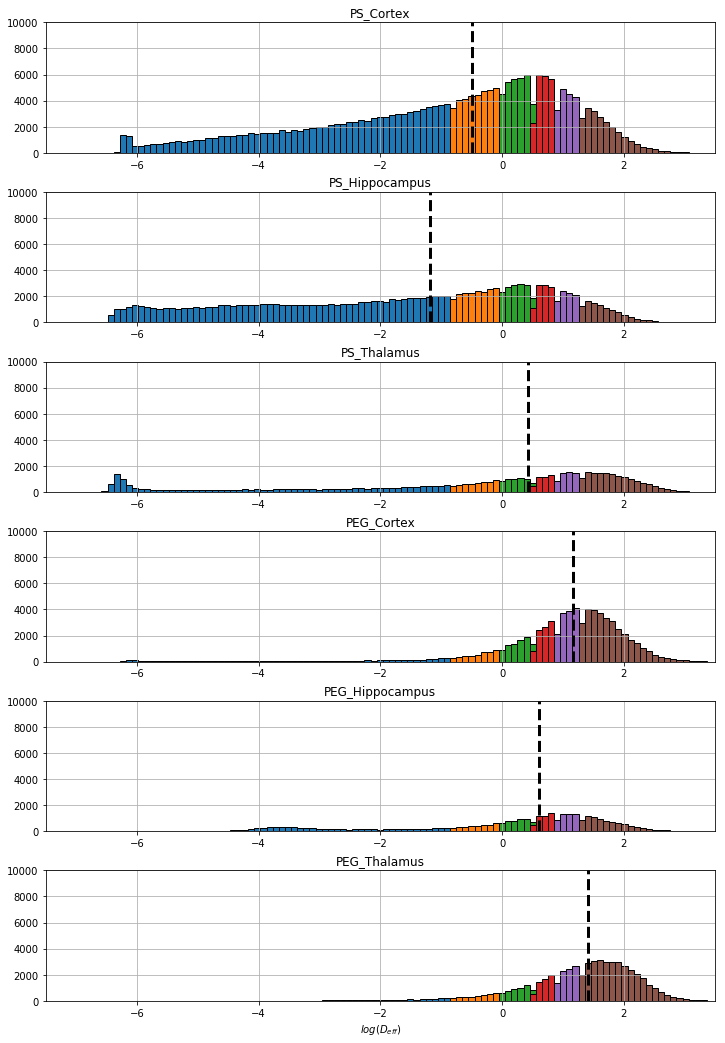

In [17]:
Dbins = [-10, -0.8422, -0.0368, 0.5158, 0.8907, 1.2865, 10]
bins = np.linspace(-10, 10, 200)
fig, axes = plt.subplots(nrows=6, figsize=(12, 18))
counter = 0
means = []
typereg = ['PS_Cortex', 'PS_Hippocampus', 'PS_Thalamus', 'PEG_Cortex', 'PEG_Hippocampus', 'PEG_Thalamus']
for ax in axes:
    means.append(fstats_tot[fstats_tot['Region and Type']==typereg[counter]]['LogDeff1'].median())
    for i in range(6):
        fstats_tot[(fstats_tot['Region and Type']==typereg[counter]) & (Dbins[i] < fstats_tot['LogDeff1']) & (fstats_tot['LogDeff1'] < Dbins[i+1])].hist(column='LogDeff1', bins=bins, figsize=(12,3), edgecolor='k', ax=ax, )
        ax.set_xlim([-7.5, 3.5])
        ax.set_ylim([0, 10000])
    ax.axvline(fstats_tot[fstats_tot['Region and Type']==typereg[counter]]['LogDeff1'].median(), color='k', linestyle='dashed', linewidth=3)
    ax.set_title(typereg[counter])
    if counter == 5:
        ax.set_xlabel(r'$log(D_{eff})$')
    counter = counter + 1

In [18]:
types = ['PS_Hippocampus', 'PS_Cortex', 'PS_Thalamus', 'PEG_Hippocampus', 'PEG_Cortex', 'PEG_Thalamus']
y_pred2 = list(pd.cut(fstats_tot.LogDeff1, bins=Dbins, labels=types).astype(str))
y_true = fstats_tot['Region and Type'].tolist()
print(classification_report(y_true, y_pred2, digits=4))

                 precision    recall  f1-score   support

     PEG_Cortex     0.2402    0.2027    0.2199     74240
PEG_Hippocampus     0.0806    0.1374    0.1016     34051
   PEG_Thalamus     0.2711    0.5558    0.3645     59388
      PS_Cortex     0.5010    0.1548    0.2365    229678
 PS_Hippocampus     0.3742    0.5492    0.4451    142563
    PS_Thalamus     0.0788    0.1040    0.0896     53595
            nan     0.0000    0.0000    0.0000         0

    avg / total     0.3527    0.2901    0.2763    593515



/home/ubuntu/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


(-7.5, 2.5)

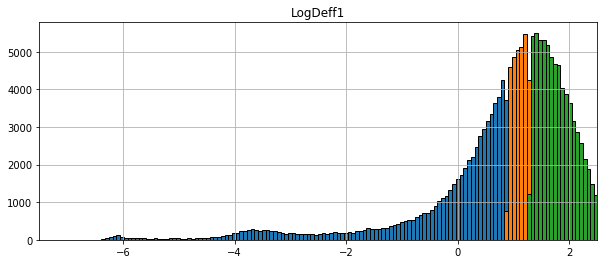

In [34]:
import matplotlib.pyplot as plt
Dbins = [-10, 0.891, 1.29, 10]
bins = np.linspace(-10, 10, 300)
fig, ax = plt.subplots(figsize=(10, 4))
for i in range(3):
    fstats_tot[(fstats_tot['Particle Type']=='PEG') & (Dbins[i] < fstats_tot['LogDeff1']) & (fstats_tot['LogDeff1'] < Dbins[i+1])].hist(column='LogDeff1', bins=bins, figsize=(4, 8), edgecolor='k', ax=ax)
ax.set_xlim([-7.5, 2.5])

In [36]:
y_pred2 = list(pd.cut(fstats_tot[fstats_tot['Particle Type']=='PEG'].LogDeff1, bins=Dbins, labels=['Hippocampus', 'Cortex', 'Thalamus']).astype(str))
y_true = fstats_tot[fstats_tot['Particle Type']=='PEG']['Region'].tolist()
print(classification_report(y_true, y_pred2, digits=4))

             precision    recall  f1-score   support

     Cortex     0.5044    0.2046    0.2911     74240
Hippocampus     0.3202    0.6048    0.4188     34051
   Thalamus     0.4492    0.5541    0.4962     59388
        nan     0.0000    0.0000    0.0000         0

avg / total     0.4475    0.4096    0.3896    167679



/home/ubuntu/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


(-7.5, 2.5)

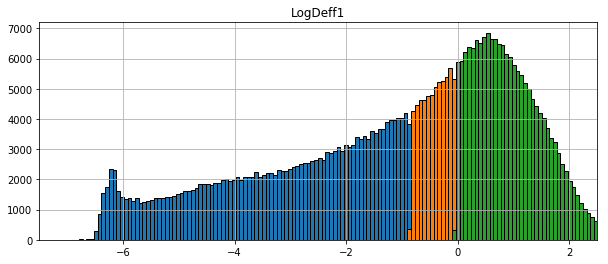

In [37]:
import matplotlib.pyplot as plt
Dbins = [-10, -0.842, -0.037, 10]
bins = np.linspace(-10, 10, 300)
fig, ax = plt.subplots(figsize=(10, 4))
for i in range(3):
    fstats_tot[(fstats_tot['Particle Type']=='PS') & (Dbins[i] < fstats_tot['LogDeff1']) & (fstats_tot['LogDeff1'] < Dbins[i+1])].hist(column='LogDeff1', bins=bins, figsize=(4, 8), edgecolor='k', ax=ax)
ax.set_xlim([-7.5, 2.5])

In [38]:
y_pred2 = list(pd.cut(fstats_tot[fstats_tot['Particle Type']=='PS'].LogDeff1, bins=Dbins, labels=['Hippocampus', 'Cortex', 'Thalamus']).astype(str))
y_true = fstats_tot[fstats_tot['Particle Type']=='PS']['Region'].tolist()
print(classification_report(y_true, y_pred2, digits=4))

             precision    recall  f1-score   support

     Cortex     0.5929    0.1547    0.2454    229678
Hippocampus     0.4001    0.5492    0.4630    142563
   Thalamus     0.1841    0.5845    0.2800     53595
        nan     0.0000    0.0000    0.0000         0

avg / total     0.4769    0.3409    0.3226    425836



/home/ubuntu/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [31]:
Dbins

[-10, -842, -0.037, 0.516, 0.891, 1.29, 10]

In [ ]:
fstats_tot.to_csv('features.csv')

In [5]:
#with equal sample sizes for each particle type
import random
counter = 0
#mws = ['10k_PEG', '5k_PEG', '1k_PEG', 'PS_COOH']
mws = ['PEG_Cortex', 'PEG_Hippocampus', 'PEG_Thalamus', 'PS_Cortex', 'PS_Hippocampus', 'PS_Thalamus']
for mw in mws:
    fstats_type = fstats_tot[fstats_tot['Region and Type']==mw].reset_index(drop=True)
    print(fstats_type.shape)
    subset = np.sort(np.array(random.sample(range(fstats_type.shape[0]), 34000)))
    if counter == 0:
        fstats_sub = fstats_type.loc[subset, :].reset_index(drop=True)
    else:
        fstats_sub = fstats_sub.append(fstats_type.loc[subset, :].reset_index(drop=True), ignore_index=True)
    counter = counter + 1

(86139, 73)
(34136, 73)
(59388, 73)
(174928, 73)
(155972, 73)
(53595, 73)


In [6]:
#fstats = pd.read_csv(filename, encoding = "ISO-8859-1", index_col='Unnamed: 0')
nonnum = ['Particle Type', 'Video Number', 'Track_ID', 'Slices', 'Pup', 'Region', 'Region and Type',
          'Mean Mean_Intensity', 'Std Mean_Intensity', 'X', 'Y',
          'Mean X', 'Mean Y', 'Std X', 'Std Y',
          'Mean alpha', 'Std alpha', 'Mean D_fit', 'Std D_fit', 'Mean kurtosis', 'Std kurtosis',
          'Mean asymmetry1', 'Std asymmetry1', 'Mean asymmetry2', 'Std asymmetry2', 'Mean asymmetry3', 'Std asymmetry3',
          'Mean AR', 'Std AR', 'Mean elongation', 'Std elongation', 'Mean boundedness', 'Std boundedness',
          'Mean fractal_dim', 'Std fractal_dim', 'Mean trappedness', 'Std trappedness', 'Mean efficiency', 'Std efficiency',
          'Mean straightness', 'Std straightness', 'Mean MSD_ratio', 'Std MSD_ratio', 'Mean frames', 'Std frames',
          'Mean Quality', 'Std Quality', 'Mean SN_Ratio', 'Std SN_Ratio', 'Mean Deff1', 'Std Deff1', 'Mean Deff2', 'Std Deff2']
fstats_num = fstats_sub.drop(nonnum, axis=1)
fstats_raw = fstats_num.values
#fstats

In [3]:
fstats_tot.columns

Index(['Track_ID', 'alpha', 'D_fit', 'kurtosis', 'asymmetry1', 'asymmetry2',
       'asymmetry3', 'AR', 'elongation', 'boundedness', 'fractal_dim',
       'trappedness', 'efficiency', 'straightness', 'MSD_ratio', 'frames', 'X',
       'Y', 'Quality', 'Mean_Intensity', 'SN_Ratio', 'Deff1', 'Deff2',
       'Mean alpha', 'Std alpha', 'Mean D_fit', 'Std D_fit', 'Mean kurtosis',
       'Std kurtosis', 'Mean asymmetry1', 'Std asymmetry1', 'Mean asymmetry2',
       'Std asymmetry2', 'Mean asymmetry3', 'Std asymmetry3', 'Mean AR',
       'Std AR', 'Mean elongation', 'Std elongation', 'Mean boundedness',
       'Std boundedness', 'Mean fractal_dim', 'Std fractal_dim',
       'Mean trappedness', 'Std trappedness', 'Mean efficiency',
       'Std efficiency', 'Mean straightness', 'Std straightness',
       'Mean MSD_ratio', 'Std MSD_ratio', 'Mean frames', 'Std frames',
       'Mean X', 'Std X', 'Mean Y', 'Std Y', 'Mean Quality', 'Std Quality',
       'Mean Mean_Intensity', 'Std Mean_Intensity', 'M

In [8]:
fstats_num.columns

Index(['alpha', 'D_fit', 'kurtosis', 'asymmetry1', 'asymmetry2', 'asymmetry3',
       'AR', 'elongation', 'boundedness', 'fractal_dim', 'trappedness',
       'efficiency', 'straightness', 'MSD_ratio', 'frames', 'Quality',
       'Mean_Intensity', 'SN_Ratio', 'Deff1', 'Deff2'],
      dtype='object')

In [ ]:
mws = ['PEG_Cortex', 'PEG_Hippocampus', 'PEG_Thalamus', 'PS_Cortex', 'PS_Hippocampus', 'PS_Thalamus']
for mw in mws:
    print(fstats_tot[fstats_tot['Region and Type'] == mw].shape)

## PCA analysis

The pca.pca_analysis function provides a completely contained PCA analysis of the input trajectory features dataset. It includes options to impute NaN values (fill in with average values or drop them), and to scale features. Read the docstring for more information. 

In [9]:
pcadataset = pca.pca_analysis(fstats_tot, dropcols=nonnum, n_components=8)

Cumulative explained variance:
0 component: 0.24777752927398158
1 component: 0.42539402165760265
2 component: 0.5330201577732919
3 component: 0.6149073132531586
4 component: 0.6838354385705526
5 component: 0.7326410616565673
6 component: 0.7784811619929204
7 component: 0.8217356893508908


In [33]:
fstats_num.columns

Index(['alpha', 'D_fit', 'kurtosis', 'asymmetry1', 'asymmetry2', 'asymmetry3',
       'AR', 'elongation', 'boundedness', 'fractal_dim', 'trappedness',
       'efficiency', 'straightness', 'MSD_ratio', 'frames', 'Quality',
       'Mean_Intensity', 'SN_Ratio', 'Deff1', 'Deff2', 'Mean alpha',
       'Std alpha', 'Mean D_fit', 'Std D_fit', 'Mean kurtosis', 'Std kurtosis',
       'Mean asymmetry1', 'Std asymmetry1', 'Mean asymmetry2',
       'Std asymmetry2', 'Mean asymmetry3', 'Std asymmetry3', 'Mean AR',
       'Std AR', 'Mean elongation', 'Std elongation', 'Mean boundedness',
       'Std boundedness', 'Mean fractal_dim', 'Std fractal_dim',
       'Mean trappedness', 'Std trappedness', 'Mean efficiency',
       'Std efficiency', 'Mean straightness', 'Std straightness',
       'Mean MSD_ratio', 'Std MSD_ratio', 'Mean frames', 'Std frames',
       'Mean Quality', 'Std Quality', 'Mean SN_Ratio', 'Std SN_Ratio',
       'Mean Deff1', 'Std Deff1', 'Mean Deff2', 'Std Deff2'],
      dtype='object

In [34]:
pcadataset.components.to_csv('components.csv')
aws.upload_s3('components.csv', '{}/components.csv'.format(remote_folder, filename), bucket_name=bucket)

In [6]:
pcadataset.prcomps

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,Mean Deff1,Mean asymmetry2,Std asymmetry3,Mean Quality,Quality,trappedness,straightness,Mean SN_Ratio,Std MSD_ratio,Std kurtosis,Std MSD_ratio,kurtosis,Std AR,Mean AR,Std AR,Std AR
1,Mean straightness,Mean asymmetry3,Std elongation,Quality,frames,boundedness,efficiency,SN_Ratio,Mean MSD_ratio,Mean kurtosis,Mean MSD_ratio,frames,Mean_Intensity,Std AR,kurtosis,kurtosis
2,Mean efficiency,Mean asymmetry1,Std asymmetry2,Std Quality,Mean asymmetry1,alpha,alpha,Std SN_Ratio,trappedness,Std MSD_ratio,Std kurtosis,Deff2,Std Deff2,Mean MSD_ratio,Deff2,frames
3,Mean fractal_dim,Mean elongation,Std asymmetry1,trappedness,straightness,Mean Deff2,D_fit,Std Quality,boundedness,Mean MSD_ratio,Std boundedness,D_fit,Mean Deff2,Mean_Intensity,alpha,fractal_dim
4,Mean D_fit,asymmetry3,Std trappedness,boundedness,Mean trappedness,Std Deff2,boundedness,Mean Quality,D_fit,boundedness,Mean kurtosis,fractal_dim,Std asymmetry3,Deff2,Std straightness,Std kurtosis


The pca.kmo function calculates the Kaiser-Meyer-Olkin statistic, a measure of sampling adequacy. Check the docstring for more information.

In [ ]:
fstats_tot.shape

In [ ]:
for test in fstats_tot.columns:
    print(test)

In [ ]:
kmostat = pca.kmo(pcadataset.scaled)

## Visualization

Users can then compare average principle component values between subgroups of the data. In this case, all particles were taken from the same sample, so there are no experimental subgroups. I chose to compare short trajectories to long trajectories, as I would expect differences between the two groups.

In [ ]:
import numpy as np
ncomp = 16
dicti = {}
#test = np.exp(np.nanmean(np.log(pcadataset.final[pcadataset.final['Particle Size']==200].as_matrix()), axis=0))[-6:]
#test1 = np.exp(np.nanmean(np.log(pcadataset.final[pcadataset.final['Particle Size']==500].as_matrix()), axis=0))[-6:]
dicti[0] = np.nanmean(pcadataset.final[pcadataset.final['Region and Type']=='PEG_Cortex'].values[:, -ncomp:], axis=0)
dicti[1] = np.nanmean(pcadataset.final[pcadataset.final['Region and Type']=='PEG_Hippocampus'].values[:, -ncomp:], axis=0)
dicti[2] = np.nanmean(pcadataset.final[pcadataset.final['Region and Type']=='PEG_Thalamus'].values[:, -ncomp:], axis=0)
dicti[3] = np.nanmean(pcadataset.final[pcadataset.final['Region and Type']=='PS_Cortex'].values[:, -ncomp:], axis=0)
dicti[4] = np.nanmean(pcadataset.final[pcadataset.final['Region and Type']=='PS_Hippocampus'].values[:, -ncomp:], axis=0)
dicti[5] = np.nanmean(pcadataset.final[pcadataset.final['Region and Type']=='PS_Thalamus'].values[:, -ncomp:], axis=0)

In [ ]:
pca.plot_pca(dicti, savefig=True, labels=['PEG_Cortex', 'PEG_Hippocampus', 'PEG_Thalamus', 'PS_Cortex', 'PS_Hippocampus',
                                          'PS_Thalamaus'], rticks=np.linspace(-5, 3, 9))

The variable pcadataset.prcomps shows the user the major contributions to each of the new principle components. When observing the graph above, users can see that there are some differences between short trajectories and long trajectories in component 0 (asymmetry1 being the major contributor) and component 1 (elongation being the major contributor).

In [ ]:
pcadataset.prcomps

In [ ]:
lvals = ['PEG_Cortex', 'PEG_Hippocampus', 'PEG_Thalamus']
feats = pca.feature_violin(pcadataset.final, label='Region and Type', lvals=lvals, fsubset=16, yrange=[-12, 12])

In [ ]:
lvals = ['PS_Cortex', 'PS_Hippocampus', 'PS_Thalamus']
feats = pca.feature_violin(pcadataset.final, label='Region and Type', lvals=lvals, fsubset=16, yrange=[-12, 12])

In [ ]:
lvals = ['PEG_Cortex', 'PEG_Hippocampus', 'PEG_Thalamus', 'PS_Cortex', 'PS_Hippocampus', 'PS_Thalamus']
#lvals = ['PS_Cortex', 'PS_Hippocampus', 'PS_Thalamus']
fstats1 = pca.feature_plot_2D(pcadataset.final,
                              label='Region and Type', lvals=lvals, randcount=300, yrange=[-6, 6],
                              xrange=[-4, 4])

In [ ]:
lvals = ['PEG_Cortex', 'PEG_Hippocampus', 'PEG_Thalamus', 'PS_Cortex', 'PS_Hippocampus', 'PS_Thalamus']
#lvals = ['PS_Cortex', 'PS_Hippocampus', 'PS_Thalamus']
fstats1 = pca.feature_plot_3D(pcadataset.final,
                              label='Region and Type', lvals=lvals, randcount=300, yrange=[-6, 6],
                              xrange=[-4, 4], alpha=0.45)

In [ ]:
xr = 12
lvals = ['PEG', 'PS']
#lvals = ['PS_Cortex', 'PS_Hippocampus', 'PS_Thalamus']
fstats1 = pca.feature_plot_3D(pcadataset.final,
                              label='Particle Type', lvals=lvals, randcount=400, ylim=[-xr, xr],
                              xlim=[-xr, xr], zlim=[-xr, xr], alpha=0.45)

In [ ]:
lvals = ['Cortex', 'Hippocampus', 'Thalamus']
#lvals = ['PS_Cortex', 'PS_Hippocampus', 'PS_Thalamus']
fstats1 = pca.feature_plot_3D(pcadataset.final,
                              label='Region', lvals=lvals, randcount=400, ylim=[-xr, xr],
                              xlim=[-xr, xr], zlim=[-xr, xr], alpha=0.45)

In [ ]:
ncomp = 16
trainp = np.array([])
testp = np.array([])
lvals = ['PEG_Cortex', 'PEG_Hippocampus', 'PEG_Thalamus', 'PS_Cortex', 'PS_Hippocampus', 'PS_Thalamus']

for i in range(0, 20):
    KNNmod, X, y = pca.build_model(pcadataset.final, 'Region and Type', lvals, equal_sampling=True,
                                       tsize=800, input_cols=ncomp, model='MLP', NNhidden_layer=(8, 6))
    trainp = np.append(trainp, pca.predict_model(KNNmod, X, y))
    
    X2 = pcadataset.final.values[:, -ncomp:]
    y2 = pcadataset.final['Region and Type'].values
    testp = np.append(testp, pca.predict_model(KNNmod, X2, y2))
    
    print('Run {}: {}'.format(i, testp[i]))

In [ ]:
print('{} +/ {}'.format(np.mean(trainp), np.std(trainp)))
print('{} +/ {}'.format(np.mean(testp), np.std(testp)))

In [ ]:
#ncomp = 8
trainp = np.array([])
testp = np.array([])
lvals = ['PEG', 'PS']

for i in range(0, 20):
    KNNmod, X, y = pca.build_model(pcadataset.final, 'Particle Type', lvals, equal_sampling=True,
                                       tsize=800, input_cols=ncomp, model='MLP', NNhidden_layer=(8, 6))
    trainp = np.append(trainp, pca.predict_model(KNNmod, X, y))
    
    X2 = pcadataset.final.values[:, -ncomp:]
    y2 = pcadataset.final['Particle Type'].values
    testp = np.append(testp, pca.predict_model(KNNmod, X2, y2))
    
    print('Run {}: {}'.format(i, testp[i]))

In [ ]:
print('{} +/ {}'.format(np.mean(trainp), np.std(trainp)))
print('{} +/ {}'.format(np.mean(testp), np.std(testp)))

In [ ]:
#ncomp = 8
trainp = np.array([])
testp = np.array([])
lvals = ['Cortex', 'Hippocampus', 'Thalamus']

for i in range(0, 20):
    KNNmod, X, y = pca.build_model(pcadataset.final, 'Region', lvals, equal_sampling=True,
                                       tsize=800, input_cols=ncomp, model='MLP', NNhidden_layer=(8, 6))
    trainp = np.append(trainp, pca.predict_model(KNNmod, X, y))
    
    X2 = pcadataset.final.values[:, -ncomp:]
    y2 = pcadataset.final['Region'].values
    testp = np.append(testp, pca.predict_model(KNNmod, X2, y2))
    
    print('Run {}: {}'.format(i, testp[i]))

In [ ]:
print('{} +/ {}'.format(np.mean(trainp), np.std(trainp)))
print('{} +/ {}'.format(np.mean(testp), np.std(testp)))

In [ ]:
#ncomp = 8
trainp = np.array([])
testp = np.array([])
lvals = ['Cortex', 'Hippocampus', 'Thalamus']

for i in range(0, 20):
    KNNmod, X, y = pca.build_model(pcadataset.final,
                                       'Region', lvals, equal_sampling=True,
                                       tsize=900, input_cols=ncomp, model='MLP', NNhidden_layer=(6, 2))

    trainp = np.append(trainp, pca.predict_model(KNNmod, X, y))
    
    X2 = pcadataset.final[pcadataset.final['Particle Type']=='PEG'].values[:, -ncomp:]
    y2 = pcadataset.final[pcadataset.final['Particle Type']=='PEG']['Region'].values
    testp = np.append(testp, pca.predict_model(KNNmod, X2, y2))
    print('Run {}: {}'.format(i, testp[i]))

In [ ]:
print('{} +/ {}'.format(np.mean(trainp), np.std(trainp)))
print('{} +/ {}'.format(np.mean(testp), np.std(testp)))

In [ ]:
#ncomp = 8
trainp = np.array([])
testp = np.array([])
lvals = ['Cortex', 'Hippocampus', 'Thalamus']

for i in range(0, 20):
    KNNmod, X, y = pca.build_model(pcadataset.final,
                                       'Region', lvals, equal_sampling=True,
                                       tsize=900, input_cols=ncomp, model='MLP', NNhidden_layer=(6, 2))

    trainp = np.append(trainp, pca.predict_model(KNNmod, X, y))
    
    X2 = pcadataset.final[pcadataset.final['Particle Type']=='PS'].values[:, -ncomp:]
    y2 = pcadataset.final[pcadataset.final['Particle Type']=='PS']['Region'].values
    testp = np.append(testp, pca.predict_model(KNNmod, X2, y2))
    print('Run {}: {}'.format(i, testp[i]))

In [ ]:
print('{} +/ {}'.format(np.mean(trainp), np.std(trainp)))
print('{} +/ {}'.format(np.mean(testp), np.std(testp)))

## Neural Network

In [10]:
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold, train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

In [ ]:
ncomp = 16
featofvar = 'Region and Type'
test = pcadataset.final.values[:, -ncomp:]
y = pcadataset.final[featofvar].values
X_train, X_test, y_train, y_test = train_test_split(test, y, test_size=0.9)

num_trials = 2
model = MLPClassifier(hidden_layer_sizes=(500, ), solver='sgd', verbose=True, max_iter=100, tol=0.001)
scores = np.zeros(num_trials)
gridps = [{'alpha': [0.001, 0.01, 0.5], 'batch_size': [10, 50, 100, 200], 'learning_rate_init': [0.001, 0.005, 0.01]}]

print('# Tuning hyper-parameters for precision')
clf = GridSearchCV(estimator=model, param_grid=gridps, cv=5, scoring='precision_macro')
clf.fit(X_train, y_train)

In [ ]:
print('Best parameters set found in development set:')
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std*2, params))
print()

In [ ]:
print("Detailed classification report")
print()
print("The model is trained on the full development set")
print("The scores are computed on the full evaluation set")
print()
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))
print()

In [13]:
ncomp = 16
featofvar = 'Region and Type'
test = pcadataset.final.values[:, -ncomp:]
y = pcadataset.final[featofvar].values
for run in range(1):
    X_train, X_test, y_train, y_test = train_test_split(test, y, test_size=0.4)

    clf = MLPClassifier(hidden_layer_sizes=(600, ), solver='sgd', verbose=True, max_iter=500, tol=0.00001,
                        alpha=0.001, batch_size=50, learning_rate_init=0.005, learning_rate='adaptive',
                        early_stopping=True, validation_fraction=0.1)

    clf.fit(X_train, y_train)
    
    print('Training Results')
    y_true1, y_pred1 = y_train, clf.predict(X_train)
    print(classification_report(y_true1, y_pred1, digits=4))
    
    print('Test Results')
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred, digits=4))

Iteration 1, loss = 0.94534191
Validation score: 0.658224
Iteration 2, loss = 0.88263717
Validation score: 0.660161
Iteration 3, loss = 0.86005620
Validation score: 0.674932
Iteration 4, loss = 0.84368826
Validation score: 0.680829
Iteration 5, loss = 0.83047942
Validation score: 0.684873
Iteration 6, loss = 0.81986715
Validation score: 0.690882
Iteration 7, loss = 0.81000294
Validation score: 0.694589
Iteration 8, loss = 0.80245675
Validation score: 0.694813
Iteration 9, loss = 0.79494027
Validation score: 0.700008
Iteration 10, loss = 0.78845733
Validation score: 0.699531
Iteration 11, loss = 0.78391422
Validation score: 0.709640
Iteration 12, loss = 0.77800236
Validation score: 0.708012
Iteration 13, loss = 0.77483070
Validation score: 0.689562
Iteration 14, loss = 0.77059020
Validation score: 0.708938
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.001000
Iteration 15, loss = 0.71585199
Validation score: 0.728792
Iterat

In [10]:
pcadataset.final['Pup and Slice'] = pcadataset.final['Pup'].map(str) + pcadataset.final['Slices']
pcadataset.final = pcadataset.final[['Pup and Slice'] + list(pcadataset.final.columns[:-1])]

In [3]:
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold, train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

In [48]:
ncomp=16
featofvar='Region and Type'
X_train = pcadataset.final[pcadataset.final['Pup and Slice'].isin(['21', '22', '23', '31', '32'])].values[:, -ncomp:] 
X_test = pcadataset.final[pcadataset.final['Pup and Slice']=='33'].values[:, -ncomp:]
y_train = pcadataset.final[pcadataset.final['Pup and Slice'].isin(['21', '22', '23', '31', '32'])][featofvar].values
y_test = pcadataset.final[pcadataset.final['Pup and Slice']=='33'][featofvar].values

for run in range(1):
    #X_train, X_test, y_train, y_test = train_test_split(test, y, test_size=0.4)

    clf = MLPClassifier(hidden_layer_sizes=(600, ), solver='sgd', verbose=True, max_iter=300, tol=0.00001,
                        alpha=0.001, batch_size=50, learning_rate_init=0.005, learning_rate='adaptive',
                        early_stopping=True, validation_fraction=0.1)

    clf.fit(X_train, y_train)
    
    print('Training Results')
    y_true1, y_pred1 = y_train, clf.predict(X_train)
    print(classification_report(y_true1, y_pred1, digits=4))
    
    print('Test Results')
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred, digits=4))

Iteration 1, loss = 0.87921105
Validation score: 0.680914
Iteration 2, loss = 0.81390040
Validation score: 0.698435
Iteration 3, loss = 0.78710493
Validation score: 0.694168
Iteration 4, loss = 0.76855484
Validation score: 0.715121
Iteration 5, loss = 0.75374668
Validation score: 0.719424
Iteration 6, loss = 0.74240932
Validation score: 0.724054
Iteration 7, loss = 0.73207758
Validation score: 0.726124
Iteration 8, loss = 0.72332108
Validation score: 0.725507
Iteration 9, loss = 0.71627009
Validation score: 0.727159
Iteration 10, loss = 0.71074436
Validation score: 0.728012
Iteration 11, loss = 0.70425373
Validation score: 0.731625
Iteration 12, loss = 0.69882208
Validation score: 0.744462
Iteration 13, loss = 0.69436315
Validation score: 0.745116
Iteration 14, loss = 0.69122910
Validation score: 0.744716
Iteration 15, loss = 0.68844058
Validation score: 0.746151
Iteration 16, loss = 0.68462405
Validation score: 0.745388
Iteration 17, loss = 0.68097780
Validation score: 0.743591
Iterat

In [11]:
ncomp=16
featofvar='Region and Type'
X_train = pcadataset.final[pcadataset.final['Pup and Slice'].isin(['33', '22', '23', '31', '32'])].values[:, -ncomp:] 
X_test = pcadataset.final[pcadataset.final['Pup and Slice']=='21'].values[:, -ncomp:]
y_train = pcadataset.final[pcadataset.final['Pup and Slice'].isin(['33', '22', '23', '31', '32'])][featofvar].values
y_test = pcadataset.final[pcadataset.final['Pup and Slice']=='21'][featofvar].values

for run in range(1):
    #X_train, X_test, y_train, y_test = train_test_split(test, y, test_size=0.4)

    clf = MLPClassifier(hidden_layer_sizes=(600, ), solver='sgd', verbose=True, max_iter=300, tol=0.00001,
                        alpha=0.001, batch_size=50, learning_rate_init=0.005, learning_rate='adaptive',
                        early_stopping=True, validation_fraction=0.1)

    clf.fit(X_train, y_train)
    
    print('Training Results')
    y_true1, y_pred1 = y_train, clf.predict(X_train)
    print(classification_report(y_true1, y_pred1, digits=4))
    
    print('Test Results')
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred, digits=4))

Iteration 1, loss = 0.87427213
Validation score: 0.688504
Iteration 2, loss = 0.81447850
Validation score: 0.704893
Iteration 3, loss = 0.78871869
Validation score: 0.714801
Iteration 4, loss = 0.77083246
Validation score: 0.714383
Iteration 5, loss = 0.75742858
Validation score: 0.710575
Iteration 6, loss = 0.74601171
Validation score: 0.725188
Iteration 7, loss = 0.73636823
Validation score: 0.728538
Iteration 8, loss = 0.72804661
Validation score: 0.730292
Iteration 9, loss = 0.72096697
Validation score: 0.738387
Iteration 10, loss = 0.71421850
Validation score: 0.739503
Iteration 11, loss = 0.70879160
Validation score: 0.740879
Iteration 12, loss = 0.70476426
Validation score: 0.745544
Iteration 13, loss = 0.69965608
Validation score: 0.736194
Iteration 14, loss = 0.69594999
Validation score: 0.740899
Iteration 15, loss = 0.69233533
Validation score: 0.750449
Iteration 16, loss = 0.68828012
Validation score: 0.747877
Iteration 17, loss = 0.68652878
Validation score: 0.746242
Iterat

In [12]:
ncomp=16
featofvar='Region and Type'
X_train = pcadataset.final[pcadataset.final['Pup and Slice'].isin(['33', '21', '23', '31', '32'])].values[:, -ncomp:] 
X_test = pcadataset.final[pcadataset.final['Pup and Slice']=='22'].values[:, -ncomp:]
y_train = pcadataset.final[pcadataset.final['Pup and Slice'].isin(['33', '21', '23', '31', '32'])][featofvar].values
y_test = pcadataset.final[pcadataset.final['Pup and Slice']=='22'][featofvar].values

for run in range(1):
    #X_train, X_test, y_train, y_test = train_test_split(test, y, test_size=0.4)

    clf = MLPClassifier(hidden_layer_sizes=(600, ), solver='sgd', verbose=True, max_iter=300, tol=0.00001,
                        alpha=0.001, batch_size=50, learning_rate_init=0.005, learning_rate='adaptive',
                        early_stopping=True, validation_fraction=0.1)

    clf.fit(X_train, y_train)
    
    print('Training Results')
    y_true1, y_pred1 = y_train, clf.predict(X_train)
    print(classification_report(y_true1, y_pred1, digits=4))
    
    print('Test Results')
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred, digits=4))

Iteration 1, loss = 0.91513375
Validation score: 0.676666
Iteration 2, loss = 0.84901955
Validation score: 0.683956
Iteration 3, loss = 0.82215145
Validation score: 0.697584
Iteration 4, loss = 0.80382540
Validation score: 0.699800
Iteration 5, loss = 0.78779502
Validation score: 0.709928
Iteration 6, loss = 0.77603382
Validation score: 0.712728
Iteration 7, loss = 0.76557242
Validation score: 0.713194
Iteration 8, loss = 0.75744243
Validation score: 0.717471
Iteration 9, loss = 0.75004473
Validation score: 0.722740
Iteration 10, loss = 0.74334953
Validation score: 0.732129
Iteration 11, loss = 0.73758221
Validation score: 0.726900
Iteration 12, loss = 0.73278078
Validation score: 0.732090
Iteration 13, loss = 0.72868753
Validation score: 0.734851
Iteration 14, loss = 0.72373075
Validation score: 0.734618
Iteration 15, loss = 0.72054757
Validation score: 0.734521
Iteration 16, loss = 0.71782092
Validation score: 0.741908
Iteration 17, loss = 0.71336276
Validation score: 0.742374
Iterat

In [13]:
ncomp=16
featofvar='Region and Type'
X_train = pcadataset.final[pcadataset.final['Pup and Slice'].isin(['33', '21', '22', '31', '32'])].values[:, -ncomp:] 
X_test = pcadataset.final[pcadataset.final['Pup and Slice']=='23'].values[:, -ncomp:]
y_train = pcadataset.final[pcadataset.final['Pup and Slice'].isin(['33', '21', '22', '31', '32'])][featofvar].values
y_test = pcadataset.final[pcadataset.final['Pup and Slice']=='23'][featofvar].values

for run in range(1):
    #X_train, X_test, y_train, y_test = train_test_split(test, y, test_size=0.4)

    clf = MLPClassifier(hidden_layer_sizes=(600, ), solver='sgd', verbose=True, max_iter=300, tol=0.00001,
                        alpha=0.001, batch_size=50, learning_rate_init=0.005, learning_rate='adaptive',
                        early_stopping=True, validation_fraction=0.1)

    clf.fit(X_train, y_train)
    
    print('Training Results')
    y_true1, y_pred1 = y_train, clf.predict(X_train)
    print(classification_report(y_true1, y_pred1, digits=4))
    
    print('Test Results')
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred, digits=4))

Iteration 1, loss = 0.95916200
Validation score: 0.653629
Iteration 2, loss = 0.89371452
Validation score: 0.662684
Iteration 3, loss = 0.86700741
Validation score: 0.679285
Iteration 4, loss = 0.84691348
Validation score: 0.672892
Iteration 5, loss = 0.83127036
Validation score: 0.692930
Iteration 6, loss = 0.81795827
Validation score: 0.692092
Iteration 7, loss = 0.80735239
Validation score: 0.699050
Iteration 8, loss = 0.79757425
Validation score: 0.694376
Iteration 9, loss = 0.78987405
Validation score: 0.701440
Iteration 10, loss = 0.78252806
Validation score: 0.712025
Iteration 11, loss = 0.77646680
Validation score: 0.713828
Iteration 12, loss = 0.77120839
Validation score: 0.707980
Iteration 13, loss = 0.76661857
Validation score: 0.702236
Iteration 14, loss = 0.76251279
Validation score: 0.711270
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.001000
Iteration 15, loss = 0.68888568
Validation score: 0.744786
Iterat

In [14]:
ncomp=16
featofvar='Region and Type'
X_train = pcadataset.final[pcadataset.final['Pup and Slice'].isin(['33', '21', '22', '23', '32'])].values[:, -ncomp:] 
X_test = pcadataset.final[pcadataset.final['Pup and Slice']=='31'].values[:, -ncomp:]
y_train = pcadataset.final[pcadataset.final['Pup and Slice'].isin(['33', '21', '22', '23', '32'])][featofvar].values
y_test = pcadataset.final[pcadataset.final['Pup and Slice']=='31'][featofvar].values

for run in range(1):
    #X_train, X_test, y_train, y_test = train_test_split(test, y, test_size=0.4)

    clf = MLPClassifier(hidden_layer_sizes=(600, ), solver='sgd', verbose=True, max_iter=300, tol=0.00001,
                        alpha=0.001, batch_size=50, learning_rate_init=0.005, learning_rate='adaptive',
                        early_stopping=True, validation_fraction=0.1)

    clf.fit(X_train, y_train)
    
    print('Training Results')
    y_true1, y_pred1 = y_train, clf.predict(X_train)
    print(classification_report(y_true1, y_pred1, digits=4))
    
    print('Test Results')
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred, digits=4))

Iteration 1, loss = 0.90572812
Validation score: 0.662703
Iteration 2, loss = 0.83304084
Validation score: 0.687235
Iteration 3, loss = 0.80164719
Validation score: 0.693857
Iteration 4, loss = 0.78057510
Validation score: 0.693932
Iteration 5, loss = 0.76424531
Validation score: 0.704191
Iteration 6, loss = 0.75018158
Validation score: 0.714676
Iteration 7, loss = 0.73925814
Validation score: 0.718138
Iteration 8, loss = 0.72832401
Validation score: 0.712619
Iteration 9, loss = 0.71979313
Validation score: 0.723305
Iteration 10, loss = 0.71368752
Validation score: 0.732636
Iteration 11, loss = 0.70704606
Validation score: 0.729049
Iteration 12, loss = 0.70011226
Validation score: 0.733037
Iteration 13, loss = 0.69511801
Validation score: 0.737151
Iteration 14, loss = 0.69009328
Validation score: 0.736499
Iteration 15, loss = 0.68575971
Validation score: 0.735671
Iteration 16, loss = 0.68090998
Validation score: 0.730328
Validation score did not improve more than tol=0.000010 for two c

In [15]:
ncomp=16
featofvar='Region and Type'
X_train = pcadataset.final[pcadataset.final['Pup and Slice'].isin(['33', '21', '22', '31', '23'])].values[:, -ncomp:] 
X_test = pcadataset.final[pcadataset.final['Pup and Slice']=='32'].values[:, -ncomp:]
y_train = pcadataset.final[pcadataset.final['Pup and Slice'].isin(['33', '21', '22', '31', '23'])][featofvar].values
y_test = pcadataset.final[pcadataset.final['Pup and Slice']=='32'][featofvar].values

for run in range(1):
    #X_train, X_test, y_train, y_test = train_test_split(test, y, test_size=0.4)

    clf = MLPClassifier(hidden_layer_sizes=(600, ), solver='sgd', verbose=True, max_iter=300, tol=0.00001,
                        alpha=0.001, batch_size=50, learning_rate_init=0.005, learning_rate='adaptive',
                        early_stopping=True, validation_fraction=0.1)

    clf.fit(X_train, y_train)
    
    print('Training Results')
    y_true1, y_pred1 = y_train, clf.predict(X_train)
    print(classification_report(y_true1, y_pred1, digits=4))
    
    print('Test Results')
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred, digits=4))

Iteration 1, loss = 0.86053248
Validation score: 0.696965
Iteration 2, loss = 0.79449639
Validation score: 0.705344
Iteration 3, loss = 0.76831133
Validation score: 0.718141
Iteration 4, loss = 0.75038739
Validation score: 0.722673
Iteration 5, loss = 0.73571062
Validation score: 0.730347
Iteration 6, loss = 0.72425649
Validation score: 0.721359
Iteration 7, loss = 0.71434547
Validation score: 0.716446
Iteration 8, loss = 0.70617271
Validation score: 0.731566
Iteration 9, loss = 0.69953841
Validation score: 0.747277
Iteration 10, loss = 0.69277431
Validation score: 0.748762
Iteration 11, loss = 0.68651025
Validation score: 0.740650
Iteration 12, loss = 0.68247732
Validation score: 0.742859
Iteration 13, loss = 0.67807179
Validation score: 0.752399
Iteration 14, loss = 0.67404349
Validation score: 0.751257
Iteration 15, loss = 0.67020915
Validation score: 0.750095
Iteration 16, loss = 0.66750794
Validation score: 0.745906
Validation score did not improve more than tol=0.000010 for two c

In [16]:
X_train = pcadataset.final[(pcadataset.final['Particle Type'] == 'PS') & (pcadataset.final['Pup and Slice'].isin(['22', '23', '31', '32', '33']))].values[:, -ncomp:] 
X_test = pcadataset.final[(pcadataset.final['Particle Type'] == 'PS') & (pcadataset.final['Pup and Slice'].isin(['21']))].values[:, -ncomp:]
y_train = pcadataset.final[(pcadataset.final['Particle Type'] == 'PS') & (pcadataset.final['Pup and Slice'].isin(['22', '23', '31', '32', '33']))]['Region'].values
y_test = pcadataset.final[(pcadataset.final['Particle Type'] == 'PS') & (pcadataset.final['Pup and Slice'].isin(['21']))]['Region'].values

for run in range(1):
    #X_train, X_test, y_train, y_test = train_test_split(test, y, test_size=0.4)

    clf = MLPClassifier(hidden_layer_sizes=(600, ), solver='sgd', verbose=True, max_iter=300, tol=0.00001,
                        alpha=0.001, batch_size=50, learning_rate_init=0.005, learning_rate='adaptive',
                        early_stopping=True, validation_fraction=0.1)

    clf.fit(X_train, y_train)
    
    print('Training Results')
    y_true1, y_pred1 = y_train, clf.predict(X_train)
    print(classification_report(y_true1, y_pred1, digits=4))
    
    print('Test Results')
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred, digits=4))

Iteration 1, loss = 0.54272225
Validation score: 0.791886
Iteration 2, loss = 0.49618900
Validation score: 0.800156
Iteration 3, loss = 0.47640230
Validation score: 0.804852
Iteration 4, loss = 0.46016504
Validation score: 0.809549
Iteration 5, loss = 0.44791004
Validation score: 0.817241
Iteration 6, loss = 0.43675552
Validation score: 0.824560
Iteration 7, loss = 0.42724134
Validation score: 0.823782
Iteration 8, loss = 0.41954219
Validation score: 0.830639
Iteration 9, loss = 0.41143698
Validation score: 0.819201
Iteration 10, loss = 0.40603601
Validation score: 0.820152
Iteration 11, loss = 0.40120583
Validation score: 0.832253
Iteration 12, loss = 0.39550953
Validation score: 0.841790
Iteration 13, loss = 0.39103040
Validation score: 0.847581
Iteration 14, loss = 0.38621930
Validation score: 0.845535
Iteration 15, loss = 0.38271509
Validation score: 0.844498
Iteration 16, loss = 0.38000570
Validation score: 0.849339
Iteration 17, loss = 0.37547217
Validation score: 0.837122
Iterat

In [17]:
X_train = pcadataset.final[(pcadataset.final['Particle Type'] == 'PS') & (pcadataset.final['Pup and Slice'].isin(['21', '23', '31', '32', '33']))].values[:, -ncomp:] 
X_test = pcadataset.final[(pcadataset.final['Particle Type'] == 'PS') & (pcadataset.final['Pup and Slice'].isin(['22']))].values[:, -ncomp:]
y_train = pcadataset.final[(pcadataset.final['Particle Type'] == 'PS') & (pcadataset.final['Pup and Slice'].isin(['21', '23', '31', '32', '33']))]['Region'].values
y_test = pcadataset.final[(pcadataset.final['Particle Type'] == 'PS') & (pcadataset.final['Pup and Slice'].isin(['22']))]['Region'].values

for run in range(1):
    #X_train, X_test, y_train, y_test = train_test_split(test, y, test_size=0.4)

    clf = MLPClassifier(hidden_layer_sizes=(600, ), solver='sgd', verbose=True, max_iter=300, tol=0.00001,
                        alpha=0.001, batch_size=50, learning_rate_init=0.005, learning_rate='adaptive',
                        early_stopping=True, validation_fraction=0.1)

    clf.fit(X_train, y_train)
    
    print('Training Results')
    y_true1, y_pred1 = y_train, clf.predict(X_train)
    print(classification_report(y_true1, y_pred1, digits=4))
    
    print('Test Results')
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred, digits=4))

Iteration 1, loss = 0.60277471
Validation score: 0.753176
Iteration 2, loss = 0.54707935
Validation score: 0.778209
Iteration 3, loss = 0.52250324
Validation score: 0.786018
Iteration 4, loss = 0.50435985
Validation score: 0.788505
Iteration 5, loss = 0.48998345
Validation score: 0.801637
Iteration 6, loss = 0.47806601
Validation score: 0.802680
Iteration 7, loss = 0.46952381
Validation score: 0.810035
Iteration 8, loss = 0.46093926
Validation score: 0.805167
Iteration 9, loss = 0.45384632
Validation score: 0.818887
Iteration 10, loss = 0.44726958
Validation score: 0.810703
Iteration 11, loss = 0.44282133
Validation score: 0.818940
Iteration 12, loss = 0.43745754
Validation score: 0.808510
Iteration 13, loss = 0.43294742
Validation score: 0.825546
Iteration 14, loss = 0.42805427
Validation score: 0.836431
Iteration 15, loss = 0.42468770
Validation score: 0.821909
Iteration 16, loss = 0.42080091
Validation score: 0.827713
Iteration 17, loss = 0.41824130
Validation score: 0.833677
Valida

In [18]:
X_train = pcadataset.final[(pcadataset.final['Particle Type'] == 'PS') & (pcadataset.final['Pup and Slice'].isin(['22', '21', '31', '32', '33']))].values[:, -ncomp:] 
X_test = pcadataset.final[(pcadataset.final['Particle Type'] == 'PS') & (pcadataset.final['Pup and Slice'].isin(['23']))].values[:, -ncomp:]
y_train = pcadataset.final[(pcadataset.final['Particle Type'] == 'PS') & (pcadataset.final['Pup and Slice'].isin(['22', '21', '31', '32', '33']))]['Region'].values
y_test = pcadataset.final[(pcadataset.final['Particle Type'] == 'PS') & (pcadataset.final['Pup and Slice'].isin(['23']))]['Region'].values

for run in range(1):
    #X_train, X_test, y_train, y_test = train_test_split(test, y, test_size=0.4)

    clf = MLPClassifier(hidden_layer_sizes=(600, ), solver='sgd', verbose=True, max_iter=300, tol=0.00001,
                        alpha=0.001, batch_size=50, learning_rate_init=0.005, learning_rate='adaptive',
                        early_stopping=True, validation_fraction=0.1)

    clf.fit(X_train, y_train)
    
    print('Training Results')
    y_true1, y_pred1 = y_train, clf.predict(X_train)
    print(classification_report(y_true1, y_pred1, digits=4))
    
    print('Test Results')
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred, digits=4))

Iteration 1, loss = 0.63182761
Validation score: 0.749218
Iteration 2, loss = 0.57343429
Validation score: 0.753536
Iteration 3, loss = 0.55034182
Validation score: 0.769648
Iteration 4, loss = 0.53371726
Validation score: 0.765687
Iteration 5, loss = 0.51983473
Validation score: 0.784746
Iteration 6, loss = 0.50813157
Validation score: 0.779058
Iteration 7, loss = 0.49719395
Validation score: 0.786355
Iteration 8, loss = 0.48981829
Validation score: 0.786533
Iteration 9, loss = 0.48144430
Validation score: 0.802496
Iteration 10, loss = 0.47318595
Validation score: 0.784002
Iteration 11, loss = 0.46709085
Validation score: 0.798922
Iteration 12, loss = 0.46063887
Validation score: 0.804342
Iteration 13, loss = 0.45552180
Validation score: 0.818398
Iteration 14, loss = 0.45069918
Validation score: 0.814140
Iteration 15, loss = 0.44647999
Validation score: 0.801900
Iteration 16, loss = 0.44183397
Validation score: 0.814021
Validation score did not improve more than tol=0.000010 for two c

In [19]:
X_train = pcadataset.final[(pcadataset.final['Particle Type'] == 'PS') & (pcadataset.final['Pup and Slice'].isin(['22', '23', '21', '32', '33']))].values[:, -ncomp:] 
X_test = pcadataset.final[(pcadataset.final['Particle Type'] == 'PS') & (pcadataset.final['Pup and Slice'].isin(['31']))].values[:, -ncomp:]
y_train = pcadataset.final[(pcadataset.final['Particle Type'] == 'PS') & (pcadataset.final['Pup and Slice'].isin(['22', '23', '21', '32', '33']))]['Region'].values
y_test = pcadataset.final[(pcadataset.final['Particle Type'] == 'PS') & (pcadataset.final['Pup and Slice'].isin(['31']))]['Region'].values

for run in range(1):
    #X_train, X_test, y_train, y_test = train_test_split(test, y, test_size=0.4)

    clf = MLPClassifier(hidden_layer_sizes=(600, ), solver='sgd', verbose=True, max_iter=300, tol=0.00001,
                        alpha=0.001, batch_size=50, learning_rate_init=0.005, learning_rate='adaptive',
                        early_stopping=True, validation_fraction=0.1)

    clf.fit(X_train, y_train)
    
    print('Training Results')
    y_true1, y_pred1 = y_train, clf.predict(X_train)
    print(classification_report(y_true1, y_pred1, digits=4))
    
    print('Test Results')
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred, digits=4))

Iteration 1, loss = 0.66354007
Validation score: 0.709548
Iteration 2, loss = 0.61117465
Validation score: 0.729414
Iteration 3, loss = 0.58586811
Validation score: 0.744355
Iteration 4, loss = 0.56729980
Validation score: 0.754472
Iteration 5, loss = 0.55118862
Validation score: 0.756616
Iteration 6, loss = 0.53690473
Validation score: 0.762881
Iteration 7, loss = 0.52653601
Validation score: 0.775745
Iteration 8, loss = 0.51539511
Validation score: 0.773534
Iteration 9, loss = 0.50649400
Validation score: 0.774271
Iteration 10, loss = 0.49891929
Validation score: 0.784824
Iteration 11, loss = 0.49143602
Validation score: 0.791156
Iteration 12, loss = 0.48539563
Validation score: 0.796181
Iteration 13, loss = 0.47949555
Validation score: 0.786868
Iteration 14, loss = 0.47360338
Validation score: 0.794238
Iteration 15, loss = 0.46819294
Validation score: 0.808275
Iteration 16, loss = 0.46306451
Validation score: 0.808978
Iteration 17, loss = 0.45938190
Validation score: 0.806198
Iterat

In [20]:
X_train = pcadataset.final[(pcadataset.final['Particle Type'] == 'PS') & (pcadataset.final['Pup and Slice'].isin(['22', '23', '31', '21', '33']))].values[:, -ncomp:] 
X_test = pcadataset.final[(pcadataset.final['Particle Type'] == 'PS') & (pcadataset.final['Pup and Slice'].isin(['32']))].values[:, -ncomp:]
y_train = pcadataset.final[(pcadataset.final['Particle Type'] == 'PS') & (pcadataset.final['Pup and Slice'].isin(['22', '23', '31', '21', '33']))]['Region'].values
y_test = pcadataset.final[(pcadataset.final['Particle Type'] == 'PS') & (pcadataset.final['Pup and Slice'].isin(['32']))]['Region'].values

for run in range(1):
    #X_train, X_test, y_train, y_test = train_test_split(test, y, test_size=0.4)

    clf = MLPClassifier(hidden_layer_sizes=(600, ), solver='sgd', verbose=True, max_iter=300, tol=0.00001,
                        alpha=0.001, batch_size=50, learning_rate_init=0.005, learning_rate='adaptive',
                        early_stopping=True, validation_fraction=0.1)

    clf.fit(X_train, y_train)
    
    print('Training Results')
    y_true1, y_pred1 = y_train, clf.predict(X_train)
    print(classification_report(y_true1, y_pred1, digits=4))
    
    print('Test Results')
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred, digits=4))

Iteration 1, loss = 0.55891076
Validation score: 0.785336
Iteration 2, loss = 0.50526160
Validation score: 0.792866
Iteration 3, loss = 0.48298054
Validation score: 0.808345
Iteration 4, loss = 0.46749364
Validation score: 0.816296
Iteration 5, loss = 0.45452807
Validation score: 0.797130
Iteration 6, loss = 0.44326906
Validation score: 0.823404
Iteration 7, loss = 0.43514440
Validation score: 0.818007
Iteration 8, loss = 0.42761687
Validation score: 0.825905
Iteration 9, loss = 0.42007278
Validation score: 0.829485
Iteration 10, loss = 0.41428374
Validation score: 0.833829
Iteration 11, loss = 0.40922587
Validation score: 0.833171
Iteration 12, loss = 0.40441964
Validation score: 0.828248
Iteration 13, loss = 0.40071264
Validation score: 0.832171
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.001000
Iteration 14, loss = 0.34855296
Validation score: 0.862419
Iteration 15, loss = 0.34208188
Validation score: 0.866105
Iterat

In [21]:
X_train = pcadataset.final[(pcadataset.final['Particle Type'] == 'PS') & (pcadataset.final['Pup and Slice'].isin(['22', '23', '31', '32', '21']))].values[:, -ncomp:] 
X_test = pcadataset.final[(pcadataset.final['Particle Type'] == 'PS') & (pcadataset.final['Pup and Slice'].isin(['33']))].values[:, -ncomp:]
y_train = pcadataset.final[(pcadataset.final['Particle Type'] == 'PS') & (pcadataset.final['Pup and Slice'].isin(['22', '23', '31', '32', '21']))]['Region'].values
y_test = pcadataset.final[(pcadataset.final['Particle Type'] == 'PS') & (pcadataset.final['Pup and Slice'].isin(['33']))]['Region'].values

for run in range(1):
    #X_train, X_test, y_train, y_test = train_test_split(test, y, test_size=0.4)

    clf = MLPClassifier(hidden_layer_sizes=(600, ), solver='sgd', verbose=True, max_iter=300, tol=0.00001,
                        alpha=0.001, batch_size=50, learning_rate_init=0.005, learning_rate='adaptive',
                        early_stopping=True, validation_fraction=0.1)

    clf.fit(X_train, y_train)
    
    print('Training Results')
    y_true1, y_pred1 = y_train, clf.predict(X_train)
    print(classification_report(y_true1, y_pred1, digits=4))
    
    print('Test Results')
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred, digits=4))

Iteration 1, loss = 0.58197055
Validation score: 0.774747
Iteration 2, loss = 0.52518889
Validation score: 0.788551
Iteration 3, loss = 0.50240536
Validation score: 0.797280
Iteration 4, loss = 0.48583025
Validation score: 0.804537
Iteration 5, loss = 0.47346042
Validation score: 0.801492
Iteration 6, loss = 0.46269888
Validation score: 0.815118
Iteration 7, loss = 0.45246170
Validation score: 0.816387
Iteration 8, loss = 0.44471130
Validation score: 0.820498
Iteration 9, loss = 0.43679073
Validation score: 0.820295
Iteration 10, loss = 0.43124332
Validation score: 0.831282
Iteration 11, loss = 0.42568435
Validation score: 0.821741
Iteration 12, loss = 0.42041049
Validation score: 0.831409
Iteration 13, loss = 0.41593947
Validation score: 0.844680
Iteration 14, loss = 0.41189948
Validation score: 0.845137
Iteration 15, loss = 0.40778473
Validation score: 0.841508
Iteration 16, loss = 0.40488790
Validation score: 0.841001
Iteration 17, loss = 0.40206055
Validation score: 0.834048
Valida

Text(0,0.5,'Validation Scores')

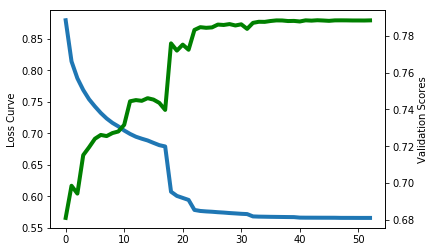

In [49]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()
ax1.plot(clf.loss_curve_, linewidth=4)
#ax1.set_xlim([0, 60])
#ax1.set_ylim([0.04, 0.18])
ax1.set_ylabel('Loss Curve')

ax2 = ax1.twinx()
ax2.plot(clf.validation_scores_, linewidth=4, c='g')
#ax2.set_ylim([0.65, 0.75])
ax2.set_ylabel('Validation Scores')

In [50]:
X_train = pcadataset.final[pcadataset.final['Pup and Slice'].isin(['22', '23', '31', '33'])].values[:, -ncomp:] 
X_test = pcadataset.final[pcadataset.final['Pup and Slice'].isin(['32', '21'])].values[:, -ncomp:]
y_train = pcadataset.final[pcadataset.final['Pup and Slice'].isin(['22', '23', '31', '33'])][featofvar].values
y_test = pcadataset.final[pcadataset.final['Pup and Slice'].isin(['32', '21'])][featofvar].values

for run in range(1):
    #X_train, X_test, y_train, y_test = train_test_split(test, y, test_size=0.4)

    clf = MLPClassifier(hidden_layer_sizes=(600, ), solver='sgd', verbose=True, max_iter=300, tol=0.00001,
                        alpha=0.001, batch_size=50, learning_rate_init=0.005, learning_rate='adaptive',
                        early_stopping=True, validation_fraction=0.1)

    clf.fit(X_train, y_train)
    
    print('Training Results')
    y_true1, y_pred1 = y_train, clf.predict(X_train)
    print(classification_report(y_true1, y_pred1, digits=4))
    
    print('Test Results')
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred, digits=4))

Iteration 1, loss = 0.79654318
Validation score: 0.727504
Iteration 2, loss = 0.73380145
Validation score: 0.731982
Iteration 3, loss = 0.70852668
Validation score: 0.736945
Iteration 4, loss = 0.69019296
Validation score: 0.749827
Iteration 5, loss = 0.67599473
Validation score: 0.745279
Iteration 6, loss = 0.66322509
Validation score: 0.761623
Iteration 7, loss = 0.65269602
Validation score: 0.758830
Iteration 8, loss = 0.64330490
Validation score: 0.758322
Iteration 9, loss = 0.63511288
Validation score: 0.765686
Iteration 10, loss = 0.62819754
Validation score: 0.767810
Iteration 11, loss = 0.62103245
Validation score: 0.757052
Iteration 12, loss = 0.61511633
Validation score: 0.759038
Iteration 13, loss = 0.60939752
Validation score: 0.777252
Iteration 14, loss = 0.60459909
Validation score: 0.780876
Iteration 15, loss = 0.60052470
Validation score: 0.776883
Iteration 16, loss = 0.59675979
Validation score: 0.781130
Iteration 17, loss = 0.59300025
Validation score: 0.779584
Iterat

In [51]:
X_train = pcadataset.final[pcadataset.final['Pup and Slice'].isin(['21', '23', '32', '33'])].values[:, -ncomp:] 
X_test = pcadataset.final[pcadataset.final['Pup and Slice'].isin(['31', '22'])].values[:, -ncomp:]
y_train = pcadataset.final[pcadataset.final['Pup and Slice'].isin(['21', '23', '32', '33'])][featofvar].values
y_test = pcadataset.final[pcadataset.final['Pup and Slice'].isin(['31', '22'])][featofvar].values

for run in range(1):
    #X_train, X_test, y_train, y_test = train_test_split(test, y, test_size=0.4)

    clf = MLPClassifier(hidden_layer_sizes=(600, ), solver='sgd', verbose=True, max_iter=300, tol=0.00001,
                        alpha=0.001, batch_size=50, learning_rate_init=0.005, learning_rate='adaptive',
                        early_stopping=True, validation_fraction=0.1)

    clf.fit(X_train, y_train)
    
    print('Training Results')
    y_true1, y_pred1 = y_train, clf.predict(X_train)
    print(classification_report(y_true1, y_pred1, digits=4))
    
    print('Test Results')
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred, digits=4))

Iteration 1, loss = 0.90328712
Validation score: 0.668367
Iteration 2, loss = 0.82445480
Validation score: 0.675189
Iteration 3, loss = 0.78996427
Validation score: 0.700632
Iteration 4, loss = 0.76599795
Validation score: 0.708550
Iteration 5, loss = 0.74558957
Validation score: 0.712868
Iteration 6, loss = 0.72970794
Validation score: 0.718126
Iteration 7, loss = 0.71589004
Validation score: 0.731739
Iteration 8, loss = 0.70439497
Validation score: 0.733398
Iteration 9, loss = 0.69433767
Validation score: 0.742943
Iteration 10, loss = 0.68541672
Validation score: 0.730644
Iteration 11, loss = 0.67665900
Validation score: 0.739313
Iteration 12, loss = 0.67070061
Validation score: 0.745979
Iteration 13, loss = 0.66307986
Validation score: 0.724635
Iteration 14, loss = 0.65848567
Validation score: 0.752175
Iteration 15, loss = 0.65142365
Validation score: 0.742254
Iteration 16, loss = 0.64840190
Validation score: 0.760844
Iteration 17, loss = 0.64388931
Validation score: 0.744195
Iterat

In [52]:
X_train = pcadataset.final[(pcadataset.final['Particle Type'] == 'PS') & (pcadataset.final['Pup and Slice'].isin(['21', '23', '32', '33']))].values[:, -ncomp:] 
X_test = pcadataset.final[(pcadataset.final['Particle Type'] == 'PS') & (pcadataset.final['Pup and Slice'].isin(['31', '22']))].values[:, -ncomp:]
y_train = pcadataset.final[(pcadataset.final['Particle Type'] == 'PS') & (pcadataset.final['Pup and Slice'].isin(['21', '23', '32', '33']))]['Region'].values
y_test = pcadataset.final[(pcadataset.final['Particle Type'] == 'PS') & (pcadataset.final['Pup and Slice'].isin(['31', '22']))]['Region'].values

for run in range(1):
    #X_train, X_test, y_train, y_test = train_test_split(test, y, test_size=0.4)

    clf = MLPClassifier(hidden_layer_sizes=(600, ), solver='sgd', verbose=True, max_iter=300, tol=0.00001,
                        alpha=0.001, batch_size=50, learning_rate_init=0.005, learning_rate='adaptive',
                        early_stopping=True, validation_fraction=0.1)

    clf.fit(X_train, y_train)
    
    print('Training Results')
    y_true1, y_pred1 = y_train, clf.predict(X_train)
    print(classification_report(y_true1, y_pred1, digits=4))
    
    print('Test Results')
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred, digits=4))

Iteration 1, loss = 0.65766771
Validation score: 0.707872
Iteration 2, loss = 0.59912483
Validation score: 0.738857
Iteration 3, loss = 0.56989629
Validation score: 0.737519
Iteration 4, loss = 0.54761370
Validation score: 0.765219
Iteration 5, loss = 0.52886484
Validation score: 0.775885
Iteration 6, loss = 0.51365741
Validation score: 0.783996
Iteration 7, loss = 0.50007289
Validation score: 0.771505
Iteration 8, loss = 0.48983402
Validation score: 0.798881
Iteration 9, loss = 0.47837296
Validation score: 0.802774
Iteration 10, loss = 0.47061690
Validation score: 0.803829
Iteration 11, loss = 0.46143080
Validation score: 0.807316
Iteration 12, loss = 0.45532208
Validation score: 0.773452
Iteration 13, loss = 0.44792748
Validation score: 0.771181
Iteration 14, loss = 0.44127683
Validation score: 0.812467
Iteration 15, loss = 0.43521391
Validation score: 0.801233
Iteration 16, loss = 0.43002426
Validation score: 0.796691
Iteration 17, loss = 0.42363227
Validation score: 0.817618
Iterat

In [53]:
X_train = pcadataset.final[(pcadataset.final['Particle Type'] == 'PS') & (pcadataset.final['Pup and Slice'].isin(['21', '23', '32', '33', '31']))].values[:, -ncomp:] 
X_test = pcadataset.final[(pcadataset.final['Particle Type'] == 'PS') & (pcadataset.final['Pup and Slice'].isin(['22']))].values[:, -ncomp:]
y_train = pcadataset.final[(pcadataset.final['Particle Type'] == 'PS') & (pcadataset.final['Pup and Slice'].isin(['21', '23', '32', '33', '31']))]['Region'].values
y_test = pcadataset.final[(pcadataset.final['Particle Type'] == 'PS') & (pcadataset.final['Pup and Slice'].isin(['22']))]['Region'].values

for run in range(1):
    #X_train, X_test, y_train, y_test = train_test_split(test, y, test_size=0.4)

    clf = MLPClassifier(hidden_layer_sizes=(600, ), solver='sgd', verbose=True, max_iter=300, tol=0.00001,
                        alpha=0.001, batch_size=50, learning_rate_init=0.005, learning_rate='adaptive',
                        early_stopping=True, validation_fraction=0.1)

    clf.fit(X_train, y_train)
    
    print('Training Results')
    y_true1, y_pred1 = y_train, clf.predict(X_train)
    print(classification_report(y_true1, y_pred1, digits=4))
    
    print('Test Results')
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred, digits=4))

Iteration 1, loss = 0.60287212
Validation score: 0.762269
Iteration 2, loss = 0.54622840
Validation score: 0.772619
Iteration 3, loss = 0.52061469
Validation score: 0.775240
Iteration 4, loss = 0.50304279
Validation score: 0.787783
Iteration 5, loss = 0.48895704
Validation score: 0.786018
Iteration 6, loss = 0.47817689
Validation score: 0.799952
Iteration 7, loss = 0.46941508
Validation score: 0.809072
Iteration 8, loss = 0.46174761
Validation score: 0.805408
Iteration 9, loss = 0.45527881
Validation score: 0.815009
Iteration 10, loss = 0.44824427
Validation score: 0.815999
Iteration 11, loss = 0.44405113
Validation score: 0.815143
Iteration 12, loss = 0.43843059
Validation score: 0.824343
Iteration 13, loss = 0.43366991
Validation score: 0.825439
Iteration 14, loss = 0.43020693
Validation score: 0.820599
Iteration 15, loss = 0.42727381
Validation score: 0.815597
Iteration 16, loss = 0.42270983
Validation score: 0.828033
Iteration 17, loss = 0.42070140
Validation score: 0.815223
Iterat

In [54]:
X_train = pcadataset.final[(pcadataset.final['Particle Type'] == 'PS') & (pcadataset.final['Pup and Slice'].isin(['21', '23', '22', '33', '31']))].values[:, -ncomp:] 
X_test = pcadataset.final[(pcadataset.final['Particle Type'] == 'PS') & (pcadataset.final['Pup and Slice'].isin(['32']))].values[:, -ncomp:]
y_train = pcadataset.final[(pcadataset.final['Particle Type'] == 'PS') & (pcadataset.final['Pup and Slice'].isin(['21', '23', '22', '33', '31']))]['Region'].values
y_test = pcadataset.final[(pcadataset.final['Particle Type'] == 'PS') & (pcadataset.final['Pup and Slice'].isin(['32']))]['Region'].values

for run in range(1):
    #X_train, X_test, y_train, y_test = train_test_split(test, y, test_size=0.4)

    clf = MLPClassifier(hidden_layer_sizes=(600, ), solver='sgd', verbose=True, max_iter=300, tol=0.00001,
                        alpha=0.001, batch_size=50, learning_rate_init=0.005, learning_rate='adaptive',
                        early_stopping=True, validation_fraction=0.1)

    clf.fit(X_train, y_train)
    
    print('Training Results')
    y_true1, y_pred1 = y_train, clf.predict(X_train)
    print(classification_report(y_true1, y_pred1, digits=4))
    
    print('Test Results')
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred, digits=4))

Iteration 1, loss = 0.56009630
Validation score: 0.781756
Iteration 2, loss = 0.50746082
Validation score: 0.792444
Iteration 3, loss = 0.48531381
Validation score: 0.803580
Iteration 4, loss = 0.46882678
Validation score: 0.806002
Iteration 5, loss = 0.45557372
Validation score: 0.794787
Iteration 6, loss = 0.44571430
Validation score: 0.811110
Iteration 7, loss = 0.43688286
Validation score: 0.803580
Iteration 8, loss = 0.42802033
Validation score: 0.815296
Iteration 9, loss = 0.42220375
Validation score: 0.830749
Iteration 10, loss = 0.41498238
Validation score: 0.820482
Iteration 11, loss = 0.41015150
Validation score: 0.828195
Iteration 12, loss = 0.40505869
Validation score: 0.838910
Iteration 13, loss = 0.40042856
Validation score: 0.839753
Iteration 14, loss = 0.39673369
Validation score: 0.815217
Iteration 15, loss = 0.39219030
Validation score: 0.843833
Iteration 16, loss = 0.38850775
Validation score: 0.836883
Iteration 17, loss = 0.38613027
Validation score: 0.825247
Iterat

In [55]:
X_train = pcadataset.final[(pcadataset.final['Particle Type'] == 'PS') & (pcadataset.final['Pup and Slice'].isin(['21', '23', '22', '33', '32']))].values[:, -ncomp:] 
X_test = pcadataset.final[(pcadataset.final['Particle Type'] == 'PS') & (pcadataset.final['Pup and Slice'].isin(['31']))].values[:, -ncomp:]
y_train = pcadataset.final[(pcadataset.final['Particle Type'] == 'PS') & (pcadataset.final['Pup and Slice'].isin(['21', '23', '22', '33', '32']))]['Region'].values
y_test = pcadataset.final[(pcadataset.final['Particle Type'] == 'PS') & (pcadataset.final['Pup and Slice'].isin(['31']))]['Region'].values

for run in range(1):
    #X_train, X_test, y_train, y_test = train_test_split(test, y, test_size=0.4)

    clf = MLPClassifier(hidden_layer_sizes=(600, ), solver='sgd', verbose=True, max_iter=300, tol=0.00001,
                        alpha=0.001, batch_size=50, learning_rate_init=0.005, learning_rate='adaptive',
                        early_stopping=True, validation_fraction=0.1)

    clf.fit(X_train, y_train)
    
    print('Training Results')
    y_true1, y_pred1 = y_train, clf.predict(X_train)
    print(classification_report(y_true1, y_pred1, digits=4))
    
    print('Test Results')
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred, digits=4))

Iteration 1, loss = 0.66299779
Validation score: 0.710385
Iteration 2, loss = 0.61231195
Validation score: 0.724556
Iteration 3, loss = 0.58573541
Validation score: 0.743484
Iteration 4, loss = 0.56661249
Validation score: 0.750318
Iteration 5, loss = 0.55097966
Validation score: 0.754070
Iteration 6, loss = 0.53891341
Validation score: 0.777253
Iteration 7, loss = 0.52717471
Validation score: 0.771792
Iteration 8, loss = 0.51729365
Validation score: 0.776080
Iteration 9, loss = 0.50905925
Validation score: 0.783183
Iteration 10, loss = 0.50078827
Validation score: 0.785293
Iteration 11, loss = 0.49452857
Validation score: 0.796281
Iteration 12, loss = 0.48815298
Validation score: 0.795812
Iteration 13, loss = 0.48172997
Validation score: 0.806097
Iteration 14, loss = 0.47817001
Validation score: 0.802580
Iteration 15, loss = 0.47393809
Validation score: 0.799162
Iteration 16, loss = 0.46806651
Validation score: 0.808007
Iteration 17, loss = 0.46463059
Validation score: 0.804154
Iterat

In [56]:
X_train = pcadataset.final[(pcadataset.final['Particle Type'] == 'PEG') & (pcadataset.final['Pup and Slice'].isin(['21', '23', '22', '33', '32']))].values[:, -ncomp:] 
X_test = pcadataset.final[(pcadataset.final['Particle Type'] == 'PEG') & (pcadataset.final['Pup and Slice'].isin(['31']))].values[:, -ncomp:]
y_train = pcadataset.final[(pcadataset.final['Particle Type'] == 'PEG') & (pcadataset.final['Pup and Slice'].isin(['21', '23', '22', '33', '32']))]['Region'].values
y_test = pcadataset.final[(pcadataset.final['Particle Type'] == 'PEG') & (pcadataset.final['Pup and Slice'].isin(['31']))]['Region'].values

for run in range(1):
    #X_train, X_test, y_train, y_test = train_test_split(test, y, test_size=0.4)

    clf = MLPClassifier(hidden_layer_sizes=(600, ), solver='sgd', verbose=True, max_iter=300, tol=0.00001,
                        alpha=0.001, batch_size=50, learning_rate_init=0.005, learning_rate='adaptive',
                        early_stopping=True, validation_fraction=0.1)

    clf.fit(X_train, y_train)
    
    print('Training Results')
    y_true1, y_pred1 = y_train, clf.predict(X_train)
    print(classification_report(y_true1, y_pred1, digits=4))
    
    print('Test Results')
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred, digits=4))

Iteration 1, loss = 0.69771722
Validation score: 0.716781
Iteration 2, loss = 0.64904383
Validation score: 0.730159
Iteration 3, loss = 0.62518313
Validation score: 0.736348
Iteration 4, loss = 0.60932271
Validation score: 0.744135
Iteration 5, loss = 0.59483328
Validation score: 0.752720
Iteration 6, loss = 0.58286091
Validation score: 0.738844
Iteration 7, loss = 0.57227648
Validation score: 0.764500
Iteration 8, loss = 0.56222262
Validation score: 0.748328
Iteration 9, loss = 0.55219258
Validation score: 0.744834
Iteration 10, loss = 0.54818618
Validation score: 0.768094
Iteration 11, loss = 0.53697373
Validation score: 0.763901
Iteration 12, loss = 0.52808259
Validation score: 0.787461
Iteration 13, loss = 0.52143334
Validation score: 0.784067
Iteration 14, loss = 0.51544228
Validation score: 0.794749
Iteration 15, loss = 0.51107528
Validation score: 0.779175
Iteration 16, loss = 0.50637712
Validation score: 0.787262
Iteration 17, loss = 0.49793713
Validation score: 0.791954
Valida

In [57]:
X_train = pcadataset.final[(pcadataset.final['Particle Type'] == 'PEG') & (pcadataset.final['Pup and Slice'].isin(['21', '23', '22', '33', '31']))].values[:, -ncomp:] 
X_test = pcadataset.final[(pcadataset.final['Particle Type'] == 'PEG') & (pcadataset.final['Pup and Slice'].isin(['32']))].values[:, -ncomp:]
y_train = pcadataset.final[(pcadataset.final['Particle Type'] == 'PEG') & (pcadataset.final['Pup and Slice'].isin(['21', '23', '22', '33', '31']))]['Region'].values
y_test = pcadataset.final[(pcadataset.final['Particle Type'] == 'PEG') & (pcadataset.final['Pup and Slice'].isin(['32']))]['Region'].values

for run in range(1):
    #X_train, X_test, y_train, y_test = train_test_split(test, y, test_size=0.4)

    clf = MLPClassifier(hidden_layer_sizes=(600, ), solver='sgd', verbose=True, max_iter=300, tol=0.00001,
                        alpha=0.001, batch_size=50, learning_rate_init=0.005, learning_rate='adaptive',
                        early_stopping=True, validation_fraction=0.1)

    clf.fit(X_train, y_train)
    
    print('Training Results')
    y_true1, y_pred1 = y_train, clf.predict(X_train)
    print(classification_report(y_true1, y_pred1, digits=4))
    
    print('Test Results')
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred, digits=4))

Iteration 1, loss = 0.86075525
Validation score: 0.623047
Iteration 2, loss = 0.82447599
Validation score: 0.635713
Iteration 3, loss = 0.80461665
Validation score: 0.649618
Iteration 4, loss = 0.78828239
Validation score: 0.649411
Iteration 5, loss = 0.77327871
Validation score: 0.666070
Iteration 6, loss = 0.76065240
Validation score: 0.662628
Iteration 7, loss = 0.74851981
Validation score: 0.673573
Iteration 8, loss = 0.73837219
Validation score: 0.673436
Iteration 9, loss = 0.72815593
Validation score: 0.692848
Iteration 10, loss = 0.71893124
Validation score: 0.688442
Iteration 11, loss = 0.71145980
Validation score: 0.695670
Iteration 12, loss = 0.70292253
Validation score: 0.693812
Iteration 13, loss = 0.69538798
Validation score: 0.696909
Iteration 14, loss = 0.68822517
Validation score: 0.703036
Iteration 15, loss = 0.68220465
Validation score: 0.715908
Iteration 16, loss = 0.67591273
Validation score: 0.719281
Iteration 17, loss = 0.67089538
Validation score: 0.718111
Iterat

In [58]:
X_train = pcadataset.final[(pcadataset.final['Particle Type'] == 'PEG') & (pcadataset.final['Pup and Slice'].isin(['21', '32', '22', '33', '31']))].values[:, -ncomp:] 
X_test = pcadataset.final[(pcadataset.final['Particle Type'] == 'PEG') & (pcadataset.final['Pup and Slice'].isin(['23']))].values[:, -ncomp:]
y_train = pcadataset.final[(pcadataset.final['Particle Type'] == 'PEG') & (pcadataset.final['Pup and Slice'].isin(['21', '32', '22', '33', '31']))]['Region'].values
y_test = pcadataset.final[(pcadataset.final['Particle Type'] == 'PEG') & (pcadataset.final['Pup and Slice'].isin(['23']))]['Region'].values

for run in range(1):
    #X_train, X_test, y_train, y_test = train_test_split(test, y, test_size=0.4)

    clf = MLPClassifier(hidden_layer_sizes=(600, ), solver='sgd', verbose=True, max_iter=300, tol=0.00001,
                        alpha=0.001, batch_size=50, learning_rate_init=0.005, learning_rate='adaptive',
                        early_stopping=True, validation_fraction=0.1)

    clf.fit(X_train, y_train)
    
    print('Training Results')
    y_true1, y_pred1 = y_train, clf.predict(X_train)
    print(classification_report(y_true1, y_pred1, digits=4))
    
    print('Test Results')
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred, digits=4))

Iteration 1, loss = 0.86368414
Validation score: 0.622815
Iteration 2, loss = 0.82760864
Validation score: 0.638313
Iteration 3, loss = 0.80507530
Validation score: 0.646593
Iteration 4, loss = 0.78883524
Validation score: 0.659755
Iteration 5, loss = 0.77415210
Validation score: 0.660392
Iteration 6, loss = 0.75852923
Validation score: 0.668318
Iteration 7, loss = 0.74547190
Validation score: 0.673555
Iteration 8, loss = 0.73508750
Validation score: 0.677093
Iteration 9, loss = 0.72533309
Validation score: 0.685585
Iteration 10, loss = 0.71537653
Validation score: 0.679287
Iteration 11, loss = 0.70676509
Validation score: 0.695421
Iteration 12, loss = 0.69696192
Validation score: 0.691600
Iteration 13, loss = 0.69125678
Validation score: 0.691954
Iteration 14, loss = 0.68384294
Validation score: 0.704692
Iteration 15, loss = 0.67898684
Validation score: 0.693511
Iteration 16, loss = 0.67129955
Validation score: 0.714104
Iteration 17, loss = 0.66400992
Validation score: 0.714245
Iterat

In [59]:
X_train = pcadataset.final[(pcadataset.final['Particle Type'] == 'PEG') & (pcadataset.final['Pup and Slice'].isin(['23', '32', '22', '33', '31']))].values[:, -ncomp:] 
X_test = pcadataset.final[(pcadataset.final['Particle Type'] == 'PEG') & (pcadataset.final['Pup and Slice'].isin(['21']))].values[:, -ncomp:]
y_train = pcadataset.final[(pcadataset.final['Particle Type'] == 'PEG') & (pcadataset.final['Pup and Slice'].isin(['23', '32', '22', '33', '31']))]['Region'].values
y_test = pcadataset.final[(pcadataset.final['Particle Type'] == 'PEG') & (pcadataset.final['Pup and Slice'].isin(['21']))]['Region'].values

for run in range(1):
    #X_train, X_test, y_train, y_test = train_test_split(test, y, test_size=0.4)

    clf = MLPClassifier(hidden_layer_sizes=(600, ), solver='sgd', verbose=True, max_iter=300, tol=0.00001,
                        alpha=0.001, batch_size=50, learning_rate_init=0.005, learning_rate='adaptive',
                        early_stopping=True, validation_fraction=0.1)

    clf.fit(X_train, y_train)
    
    print('Training Results')
    y_true1, y_pred1 = y_train, clf.predict(X_train)
    print(classification_report(y_true1, y_pred1, digits=4))
    
    print('Test Results')
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred, digits=4))

Iteration 1, loss = 0.85717311
Validation score: 0.630186
Iteration 2, loss = 0.82316037
Validation score: 0.643000
Iteration 3, loss = 0.80445206
Validation score: 0.652644
Iteration 4, loss = 0.78816941
Validation score: 0.652126
Iteration 5, loss = 0.77354674
Validation score: 0.660216
Iteration 6, loss = 0.76107237
Validation score: 0.668371
Iteration 7, loss = 0.74772637
Validation score: 0.673096
Iteration 8, loss = 0.73725612
Validation score: 0.685004
Iteration 9, loss = 0.72731047
Validation score: 0.679309
Iteration 10, loss = 0.71770742
Validation score: 0.684033
Iteration 11, loss = 0.70868597
Validation score: 0.694389
Iteration 12, loss = 0.70073486
Validation score: 0.685587
Iteration 13, loss = 0.69344652
Validation score: 0.693871
Iteration 14, loss = 0.68510348
Validation score: 0.686752
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.001000
Iteration 15, loss = 0.63881213
Validation score: 0.728432
Iterat

In [60]:
X_train = pcadataset.final[(pcadataset.final['Particle Type'] == 'PEG') & (pcadataset.final['Pup and Slice'].isin(['23', '32', '21', '33', '31']))].values[:, -ncomp:] 
X_test = pcadataset.final[(pcadataset.final['Particle Type'] == 'PEG') & (pcadataset.final['Pup and Slice'].isin(['22']))].values[:, -ncomp:]
y_train = pcadataset.final[(pcadataset.final['Particle Type'] == 'PEG') & (pcadataset.final['Pup and Slice'].isin(['23', '32', '21', '33', '31']))]['Region'].values
y_test = pcadataset.final[(pcadataset.final['Particle Type'] == 'PEG') & (pcadataset.final['Pup and Slice'].isin(['22']))]['Region'].values

for run in range(1):
    #X_train, X_test, y_train, y_test = train_test_split(test, y, test_size=0.4)

    clf = MLPClassifier(hidden_layer_sizes=(600, ), solver='sgd', verbose=True, max_iter=300, tol=0.00001,
                        alpha=0.001, batch_size=50, learning_rate_init=0.005, learning_rate='adaptive',
                        early_stopping=True, validation_fraction=0.1)

    clf.fit(X_train, y_train)
    
    print('Training Results')
    y_true1, y_pred1 = y_train, clf.predict(X_train)
    print(classification_report(y_true1, y_pred1, digits=4))
    
    print('Test Results')
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred, digits=4))

Iteration 1, loss = 0.86223163
Validation score: 0.635464
Iteration 2, loss = 0.83093581
Validation score: 0.633685
Iteration 3, loss = 0.81318358
Validation score: 0.653830
Iteration 4, loss = 0.79718128
Validation score: 0.659880
Iteration 5, loss = 0.78276938
Validation score: 0.665006
Iteration 6, loss = 0.77054004
Validation score: 0.666501
Iteration 7, loss = 0.75812354
Validation score: 0.669206
Iteration 8, loss = 0.74727330
Validation score: 0.673761
Iteration 9, loss = 0.73658927
Validation score: 0.677748
Iteration 10, loss = 0.72799666
Validation score: 0.686931
Iteration 11, loss = 0.72050401
Validation score: 0.686219
Iteration 12, loss = 0.71181319
Validation score: 0.691059
Iteration 13, loss = 0.70522006
Validation score: 0.699815
Iteration 14, loss = 0.69884229
Validation score: 0.695829
Iteration 15, loss = 0.69066460
Validation score: 0.694263
Iteration 16, loss = 0.68306704
Validation score: 0.699459
Validation score did not improve more than tol=0.000010 for two c

In [61]:
X_train = pcadataset.final[(pcadataset.final['Particle Type'] == 'PEG') & (pcadataset.final['Pup and Slice'].isin(['23', '32', '21', '22', '31']))].values[:, -ncomp:] 
X_test = pcadataset.final[(pcadataset.final['Particle Type'] == 'PEG') & (pcadataset.final['Pup and Slice'].isin(['33']))].values[:, -ncomp:]
y_train = pcadataset.final[(pcadataset.final['Particle Type'] == 'PEG') & (pcadataset.final['Pup and Slice'].isin(['23', '32', '21', '22', '31']))]['Region'].values
y_test = pcadataset.final[(pcadataset.final['Particle Type'] == 'PEG') & (pcadataset.final['Pup and Slice'].isin(['33']))]['Region'].values

for run in range(1):
    #X_train, X_test, y_train, y_test = train_test_split(test, y, test_size=0.4)

    clf = MLPClassifier(hidden_layer_sizes=(600, ), solver='sgd', verbose=True, max_iter=300, tol=0.00001,
                        alpha=0.001, batch_size=50, learning_rate_init=0.005, learning_rate='adaptive',
                        early_stopping=True, validation_fraction=0.1)

    clf.fit(X_train, y_train)
    
    print('Training Results')
    y_true1, y_pred1 = y_train, clf.predict(X_train)
    print(classification_report(y_true1, y_pred1, digits=4))
    
    print('Test Results')
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred, digits=4))

Iteration 1, loss = 0.86762681
Validation score: 0.622838
Iteration 2, loss = 0.82925661
Validation score: 0.624689
Iteration 3, loss = 0.80730099
Validation score: 0.641795
Iteration 4, loss = 0.78901915
Validation score: 0.630625
Iteration 5, loss = 0.77428942
Validation score: 0.650156
Iteration 6, loss = 0.76382629
Validation score: 0.564499
Iteration 7, loss = 0.75201663
Validation score: 0.643710
Iteration 8, loss = 0.73944835
Validation score: 0.664965
Iteration 9, loss = 0.72768451
Validation score: 0.639944
Iteration 10, loss = 0.71995726
Validation score: 0.677539
Iteration 11, loss = 0.70940165
Validation score: 0.647539
Iteration 12, loss = 0.70362172
Validation score: 0.670262
Iteration 13, loss = 0.69582789
Validation score: 0.695219
Iteration 14, loss = 0.68678618
Validation score: 0.682837
Iteration 15, loss = 0.68046818
Validation score: 0.694262
Iteration 16, loss = 0.67332558
Validation score: 0.702368
Iteration 17, loss = 0.66803368
Validation score: 0.658390
Iterat

In [62]:
X_train = pcadataset.final[(pcadataset.final['Particle Type'] == 'PEG') & (pcadataset.final['Pup and Slice'].isin(['23', '32', '21', '31']))].values[:, -ncomp:] 
X_test = pcadataset.final[(pcadataset.final['Particle Type'] == 'PEG') & (pcadataset.final['Pup and Slice'].isin(['33', '22']))].values[:, -ncomp:]
y_train = pcadataset.final[(pcadataset.final['Particle Type'] == 'PEG') & (pcadataset.final['Pup and Slice'].isin(['23', '32', '21', '31']))]['Region'].values
y_test = pcadataset.final[(pcadataset.final['Particle Type'] == 'PEG') & (pcadataset.final['Pup and Slice'].isin(['33', '22']))]['Region'].values

for run in range(1):
    #X_train, X_test, y_train, y_test = train_test_split(test, y, test_size=0.4)

    clf = MLPClassifier(hidden_layer_sizes=(600, ), solver='sgd', verbose=True, max_iter=300, tol=0.00001,
                        alpha=0.001, batch_size=50, learning_rate_init=0.005, learning_rate='adaptive',
                        early_stopping=True, validation_fraction=0.1)

    clf.fit(X_train, y_train)
    
    print('Training Results')
    y_true1, y_pred1 = y_train, clf.predict(X_train)
    print(classification_report(y_true1, y_pred1, digits=4))
    
    print('Test Results')
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred, digits=4))

Iteration 1, loss = 0.86909629
Validation score: 0.627945
Iteration 2, loss = 0.83608793
Validation score: 0.645014
Iteration 3, loss = 0.81623139
Validation score: 0.651116
Iteration 4, loss = 0.79874383
Validation score: 0.665482
Iteration 5, loss = 0.78375545
Validation score: 0.657604
Iteration 6, loss = 0.77008813
Validation score: 0.668495
Iteration 7, loss = 0.75668122
Validation score: 0.666718
Iteration 8, loss = 0.74518344
Validation score: 0.683402
Iteration 9, loss = 0.73364494
Validation score: 0.687572
Iteration 10, loss = 0.72322022
Validation score: 0.695451
Iteration 11, loss = 0.71374646
Validation score: 0.691357
Iteration 12, loss = 0.70525974
Validation score: 0.683479
Iteration 13, loss = 0.69690452
Validation score: 0.702788
Iteration 14, loss = 0.69013535
Validation score: 0.693520
Iteration 15, loss = 0.68254654
Validation score: 0.709431
Iteration 16, loss = 0.67542798
Validation score: 0.712829
Iteration 17, loss = 0.66999720
Validation score: 0.714915
Iterat

In [63]:
X_train = pcadataset.final[(pcadataset.final['Particle Type'] == 'PEG') & (pcadataset.final['Pup and Slice'].isin(['22', '33', '21', '31']))].values[:, -ncomp:] 
X_test = pcadataset.final[(pcadataset.final['Particle Type'] == 'PEG') & (pcadataset.final['Pup and Slice'].isin(['23', '32']))].values[:, -ncomp:]
y_train = pcadataset.final[(pcadataset.final['Particle Type'] == 'PEG') & (pcadataset.final['Pup and Slice'].isin(['22', '33', '21', '31']))]['Region'].values
y_test = pcadataset.final[(pcadataset.final['Particle Type'] == 'PEG') & (pcadataset.final['Pup and Slice'].isin(['23', '32']))]['Region'].values

for run in range(1):
    #X_train, X_test, y_train, y_test = train_test_split(test, y, test_size=0.4)

    clf = MLPClassifier(hidden_layer_sizes=(600, ), solver='sgd', verbose=True, max_iter=300, tol=0.00001,
                        alpha=0.001, batch_size=50, learning_rate_init=0.005, learning_rate='adaptive',
                        early_stopping=True, validation_fraction=0.1)

    clf.fit(X_train, y_train)
    
    print('Training Results')
    y_true1, y_pred1 = y_train, clf.predict(X_train)
    print(classification_report(y_true1, y_pred1, digits=4))
    
    print('Test Results')
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred, digits=4))

Iteration 1, loss = 0.86248144
Validation score: 0.605887
Iteration 2, loss = 0.82164744
Validation score: 0.622288
Iteration 3, loss = 0.80030083
Validation score: 0.642473
Iteration 4, loss = 0.78164220
Validation score: 0.635997
Iteration 5, loss = 0.76683336
Validation score: 0.659209
Iteration 6, loss = 0.75318951
Validation score: 0.650463
Iteration 7, loss = 0.74110366
Validation score: 0.674180
Iteration 8, loss = 0.72819849
Validation score: 0.672161
Iteration 9, loss = 0.71724795
Validation score: 0.677460
Iteration 10, loss = 0.70857489
Validation score: 0.677124
Iteration 11, loss = 0.69774093
Validation score: 0.696804
Iteration 12, loss = 0.68934693
Validation score: 0.673759
Iteration 13, loss = 0.68303524
Validation score: 0.699243
Iteration 14, loss = 0.67374859
Validation score: 0.705551
Iteration 15, loss = 0.66537285
Validation score: 0.685534
Iteration 16, loss = 0.65953987
Validation score: 0.670563
Iteration 17, loss = 0.65201191
Validation score: 0.722876
Iterat

In [64]:
X_train = pcadataset.final[(pcadataset.final['Particle Type'] == 'PEG') & (pcadataset.final['Pup and Slice'].isin(['22', '33', '21']))].values[:, -ncomp:] 
X_test = pcadataset.final[(pcadataset.final['Particle Type'] == 'PEG') & (pcadataset.final['Pup and Slice'].isin(['23', '32', '31']))].values[:, -ncomp:]
y_train = pcadataset.final[(pcadataset.final['Particle Type'] == 'PEG') & (pcadataset.final['Pup and Slice'].isin(['22', '33', '21']))]['Region'].values
y_test = pcadataset.final[(pcadataset.final['Particle Type'] == 'PEG') & (pcadataset.final['Pup and Slice'].isin(['23', '32', '31']))]['Region'].values

for run in range(1):
    #X_train, X_test, y_train, y_test = train_test_split(test, y, test_size=0.4)

    clf = MLPClassifier(hidden_layer_sizes=(600, ), solver='sgd', verbose=True, max_iter=300, tol=0.00001,
                        alpha=0.001, batch_size=50, learning_rate_init=0.005, learning_rate='adaptive',
                        early_stopping=True, validation_fraction=0.1)

    clf.fit(X_train, y_train)
    
    print('Training Results')
    y_true1, y_pred1 = y_train, clf.predict(X_train)
    print(classification_report(y_true1, y_pred1, digits=4))
    
    print('Test Results')
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred, digits=4))

Iteration 1, loss = 0.53197450
Validation score: 0.787896
Iteration 2, loss = 0.46869179
Validation score: 0.807939
Iteration 3, loss = 0.44456706
Validation score: 0.812804
Iteration 4, loss = 0.42636299
Validation score: 0.816307
Iteration 5, loss = 0.41345755
Validation score: 0.823507
Iteration 6, loss = 0.40154407
Validation score: 0.830512
Iteration 7, loss = 0.39076959
Validation score: 0.836349
Iteration 8, loss = 0.38114976
Validation score: 0.845495
Iteration 9, loss = 0.37185565
Validation score: 0.839268
Iteration 10, loss = 0.36490693
Validation score: 0.850165
Iteration 11, loss = 0.35605271
Validation score: 0.844717
Iteration 12, loss = 0.35108495
Validation score: 0.852500
Iteration 13, loss = 0.34413792
Validation score: 0.855809
Iteration 14, loss = 0.33783950
Validation score: 0.860090
Iteration 15, loss = 0.33247088
Validation score: 0.865927
Iteration 16, loss = 0.32677906
Validation score: 0.865149
Iteration 17, loss = 0.32239895
Validation score: 0.860284
Iterat

In [65]:
X_train = pcadataset.final[(pcadataset.final['Particle Type'] == 'PEG') & (pcadataset.final['Pup and Slice'].isin(['22', '33', '21']))].values[:, -ncomp:] 
X_test = pcadataset.final[(pcadataset.final['Particle Type'] == 'PEG') & (pcadataset.final['Pup and Slice'].isin(['32', '31']))].values[:, -ncomp:]
y_train = pcadataset.final[(pcadataset.final['Particle Type'] == 'PEG') & (pcadataset.final['Pup and Slice'].isin(['22', '33', '21']))]['Region'].values
y_test = pcadataset.final[(pcadataset.final['Particle Type'] == 'PEG') & (pcadataset.final['Pup and Slice'].isin(['32', '31']))]['Region'].values

for run in range(1):
    #X_train, X_test, y_train, y_test = train_test_split(test, y, test_size=0.4)

    clf = MLPClassifier(hidden_layer_sizes=(600, ), solver='sgd', verbose=True, max_iter=300, tol=0.00001,
                        alpha=0.001, batch_size=50, learning_rate_init=0.005, learning_rate='adaptive',
                        early_stopping=True, validation_fraction=0.1)

    clf.fit(X_train, y_train)
    
    print('Training Results')
    y_true1, y_pred1 = y_train, clf.predict(X_train)
    print(classification_report(y_true1, y_pred1, digits=4))
    
    print('Test Results')
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred, digits=4))

Iteration 1, loss = 0.52673372
Validation score: 0.802685
Iteration 2, loss = 0.46657290
Validation score: 0.813582
Iteration 3, loss = 0.44256231
Validation score: 0.817474
Iteration 4, loss = 0.42526483
Validation score: 0.821755
Iteration 5, loss = 0.41161857
Validation score: 0.829928
Iteration 6, loss = 0.39941582
Validation score: 0.841020
Iteration 7, loss = 0.38986898
Validation score: 0.842382
Iteration 8, loss = 0.38049911
Validation score: 0.849971
Iteration 9, loss = 0.37169740
Validation score: 0.849971
Iteration 10, loss = 0.36420626
Validation score: 0.855030
Iteration 11, loss = 0.35702893
Validation score: 0.858533
Iteration 12, loss = 0.35176674
Validation score: 0.854057
Iteration 13, loss = 0.34401991
Validation score: 0.868068
Iteration 14, loss = 0.33871504
Validation score: 0.871376
Iteration 15, loss = 0.33354979
Validation score: 0.865927
Iteration 16, loss = 0.32893602
Validation score: 0.873322
Iteration 17, loss = 0.32440242
Validation score: 0.865927
Iterat

In [66]:
X_train = pcadataset.final[(pcadataset.final['Particle Type'] == 'PEG') & (pcadataset.final['Pup and Slice'].isin(['32', '33', '21', '23']))].values[:, -ncomp:] 
X_test = pcadataset.final[(pcadataset.final['Particle Type'] == 'PEG') & (pcadataset.final['Pup and Slice'].isin(['22', '31']))].values[:, -ncomp:]
y_train = pcadataset.final[(pcadataset.final['Particle Type'] == 'PEG') & (pcadataset.final['Pup and Slice'].isin(['32', '33', '21', '23']))]['Region'].values
y_test = pcadataset.final[(pcadataset.final['Particle Type'] == 'PEG') & (pcadataset.final['Pup and Slice'].isin(['22', '31']))]['Region'].values

for run in range(1):
    #X_train, X_test, y_train, y_test = train_test_split(test, y, test_size=0.4)

    clf = MLPClassifier(hidden_layer_sizes=(600, ), solver='sgd', verbose=True, max_iter=300, tol=0.00001,
                        alpha=0.001, batch_size=50, learning_rate_init=0.005, learning_rate='adaptive',
                        early_stopping=True, validation_fraction=0.1)

    clf.fit(X_train, y_train)
    
    print('Training Results')
    y_true1, y_pred1 = y_train, clf.predict(X_train)
    print(classification_report(y_true1, y_pred1, digits=4))
    
    print('Test Results')
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred, digits=4))

Iteration 1, loss = 0.69012366
Validation score: 0.730300
Iteration 2, loss = 0.63867665
Validation score: 0.743730
Iteration 3, loss = 0.61966453
Validation score: 0.753186
Iteration 4, loss = 0.60354254
Validation score: 0.753597
Iteration 5, loss = 0.59024747
Validation score: 0.755516
Iteration 6, loss = 0.57977158
Validation score: 0.760449
Iteration 7, loss = 0.56881096
Validation score: 0.764287
Iteration 8, loss = 0.56024437
Validation score: 0.770865
Iteration 9, loss = 0.55069075
Validation score: 0.775113
Iteration 10, loss = 0.54251985
Validation score: 0.772783
Iteration 11, loss = 0.53480077
Validation score: 0.774154
Iteration 12, loss = 0.52911507
Validation score: 0.780184
Iteration 13, loss = 0.52043851
Validation score: 0.783747
Iteration 14, loss = 0.51368581
Validation score: 0.788680
Iteration 15, loss = 0.50807690
Validation score: 0.771824
Iteration 16, loss = 0.49943285
Validation score: 0.757298
Iteration 17, loss = 0.49642624
Validation score: 0.783473
Valida

Text(0,0.5,'Validation Scores')

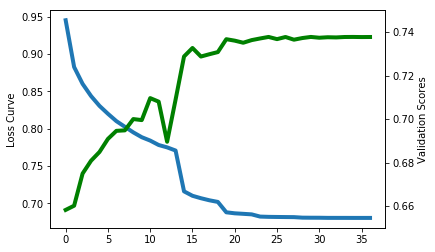

In [18]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()
ax1.plot(clf.loss_curve_, linewidth=4)
#ax1.set_xlim([0, 60])
#ax1.set_ylim([0.04, 0.18])
ax1.set_ylabel('Loss Curve')

ax2 = ax1.twinx()
ax2.plot(clf.validation_scores_, linewidth=4, c='g')
ax2.set_ylim([0.65, 0.75])
ax2.set_ylabel('Validation Scores')

In [19]:
ncomp = 16
featofvar = 'Region'
test = pcadataset.final[pcadataset.final['Particle Type'] == 'PEG'].values[:, -ncomp:]
y = pcadataset.final[pcadataset.final['Particle Type'] == 'PEG'][featofvar].values
for run in range(1):
    X_train, X_test, y_train, y_test = train_test_split(test, y, test_size=0.4)

    clf = MLPClassifier(hidden_layer_sizes=(600, ), solver='sgd', verbose=True, max_iter=500, tol=0.00001,
                        alpha=0.001, batch_size=50, learning_rate_init=0.005, learning_rate='adaptive',
                        early_stopping=True, validation_fraction=0.1)

    clf.fit(X_train, y_train)
    
    print('Training Results')
    y_true1, y_pred1 = y_train, clf.predict(X_train)
    print(classification_report(y_true1, y_pred1, digits=4))
    
    print('Test Results')
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred, digits=4))

Iteration 1, loss = 0.86863832
Validation score: 0.621509
Iteration 2, loss = 0.83771882
Validation score: 0.631746
Iteration 3, loss = 0.82260778
Validation score: 0.631349
Iteration 4, loss = 0.80943970
Validation score: 0.647351
Iteration 5, loss = 0.79998215
Validation score: 0.644568
Iteration 6, loss = 0.78895729
Validation score: 0.653215
Iteration 7, loss = 0.78056590
Validation score: 0.650929
Iteration 8, loss = 0.77269863
Validation score: 0.659875
Iteration 9, loss = 0.76466378
Validation score: 0.663055
Iteration 10, loss = 0.75755287
Validation score: 0.666435
Iteration 11, loss = 0.74855882
Validation score: 0.669317
Iteration 12, loss = 0.74150655
Validation score: 0.666534
Iteration 13, loss = 0.73604237
Validation score: 0.668820
Iteration 14, loss = 0.72885647
Validation score: 0.676275
Iteration 15, loss = 0.72485345
Validation score: 0.678163
Iteration 16, loss = 0.71839161
Validation score: 0.685518
Iteration 17, loss = 0.71237154
Validation score: 0.681940
Iterat

Text(0,0.5,'Validation Scores')

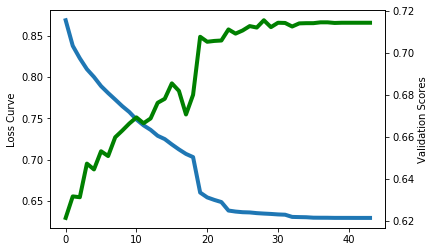

In [20]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()
ax1.plot(clf.loss_curve_, linewidth=4)
#ax1.set_xlim([0, 60])
#ax1.set_ylim([0.04, 0.18])
ax1.set_ylabel('Loss Curve')

ax2 = ax1.twinx()
ax2.plot(clf.validation_scores_, linewidth=4, c='g')
#ax2.set_ylim([0.65, 0.75])
ax2.set_ylabel('Validation Scores')

In [21]:
ncomp = 16
featofvar = 'Region'
test = pcadataset.final[pcadataset.final['Particle Type'] == 'PS'].values[:, -ncomp:]
y = pcadataset.final[pcadataset.final['Particle Type'] == 'PS'][featofvar].values
for run in range(1):
    X_train, X_test, y_train, y_test = train_test_split(test, y, test_size=0.4)

    clf = MLPClassifier(hidden_layer_sizes=(600, ), solver='sgd', verbose=True, max_iter=500, tol=0.00001,
                        alpha=0.001, batch_size=50, learning_rate_init=0.005, learning_rate='adaptive',
                        early_stopping=True, validation_fraction=0.1)

    clf.fit(X_train, y_train)
    
    print('Training Results')
    y_true1, y_pred1 = y_train, clf.predict(X_train)
    print(classification_report(y_true1, y_pred1, digits=4))
    
    print('Test Results')
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred, digits=4))

Iteration 1, loss = 0.63771628
Validation score: 0.734335
Iteration 2, loss = 0.58705527
Validation score: 0.750029
Iteration 3, loss = 0.56647855
Validation score: 0.758013
Iteration 4, loss = 0.55304366
Validation score: 0.765097
Iteration 5, loss = 0.54038252
Validation score: 0.768815
Iteration 6, loss = 0.53139656
Validation score: 0.776251
Iteration 7, loss = 0.52167845
Validation score: 0.778365
Iteration 8, loss = 0.51496921
Validation score: 0.777308
Iteration 9, loss = 0.50821986
Validation score: 0.788423
Iteration 10, loss = 0.50308900
Validation score: 0.782787
Iteration 11, loss = 0.49552622
Validation score: 0.785605
Iteration 12, loss = 0.49240266
Validation score: 0.795938
Iteration 13, loss = 0.48642715
Validation score: 0.796720
Iteration 14, loss = 0.48312218
Validation score: 0.782396
Iteration 15, loss = 0.47825622
Validation score: 0.802904
Iteration 16, loss = 0.47605118
Validation score: 0.802669
Iteration 17, loss = 0.47116627
Validation score: 0.804743
Iterat

Text(0,0.5,'Validation Scores')

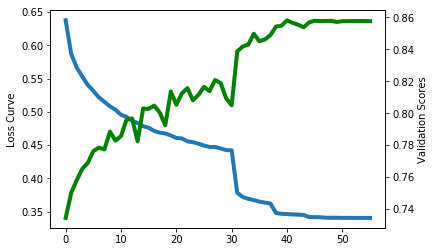

In [22]:
fig, ax1 = plt.subplots()
ax1.plot(clf.loss_curve_, linewidth=4)
#ax1.set_xlim([0, 60])
#ax1.set_ylim([0.04, 0.18])
ax1.set_ylabel('Loss Curve')

ax2 = ax1.twinx()
ax2.plot(clf.validation_scores_, linewidth=4, c='g')
#ax2.set_ylim([0.65, 0.75])
ax2.set_ylabel('Validation Scores')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff2cbe94390>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7ff2cb806550>], dtype=object)

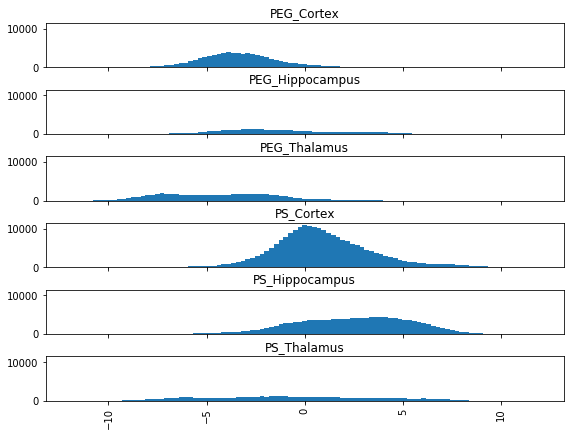

In [26]:
pcadataset.final.hist(column=0, by='Region and Type', sharex=True, bins=np.linspace(-12, 12, 100),
                figsize=(9, 7), grid=False, layout=(6,1), sharey=True, )

In [30]:
y_true2 = fstats_tot['Region and Type'].values
labels3 = ['PEG_Cortex', 'PEG_']

size3 = np.random.rand(len(y_true2))
y_pred2 = list(pd.cut(size3, bins=[0, 0.1667, 0.3333, 0.5, 0.66667, 0.83333, 10], labels=mws).astype(str))
print(classification_report(y_true2, y_pred2, digits=4))

                 precision    recall  f1-score   support

     PEG_Cortex     0.1248    0.1667    0.1427     74240
PEG_Hippocampus     0.0571    0.1656    0.0849     34051
   PEG_Thalamus     0.1005    0.1670    0.1255     59388
      PS_Cortex     0.3869    0.1660    0.2323    229678
 PS_Hippocampus     0.2404    0.1670    0.1971    142563
    PS_Thalamus     0.0900    0.1668    0.1169     53595

    avg / total     0.2445    0.1665    0.1831    593515



In [31]:
0.75/0.16667

4.499910001799964

## Alternate binning

In [11]:
bins = list(range(0, 2048+1, 256))
pcadataset.final['binx'] = pd.cut(pcadataset.final.X, bins, labels=[0, 1, 2, 3, 4, 5, 6, 7])
pcadataset.final['biny'] = pd.cut(pcadataset.final.Y, bins, labels=[0, 1, 2, 3, 4, 5, 6, 7])
pcadataset.final['bins'] = 8*pcadataset.final['binx'] + pcadataset.final['biny']
pcadataset.final = pcadataset.final[np.isfinite(pcadataset.final.bins)]
pcadataset.final.bins = pcadataset.final.bins.astype(int)

cols = pcadataset.final.columns.tolist()
cols = cols[-3:] + cols[:-3]
pcadataset.final = pcadataset.final[cols]

def checkerboard(size):
    rows = int(size/2)
    checks = list(range(0, size*size, size+1))
    
    for i in range(1, rows):
        ssize = size - 2*i
        for j in range(0, ssize):
            checks.append(2*i + (size+1)*j)

    for i in range(1, rows):
        ssize = size - 2*i
        for j in range(0, ssize):
            checks.append(size*size - 1 - (2*i + (size+1)*j))
    checks.sort()
    return checks

In [12]:
featofvar = 'Region and Type'
ncomp = 8

training = [1, 3, 5, 7] + checkerboard(8)

X_train = pcadataset.final[pcadataset.final.bins.isin(training)].values[:, -ncomp:]
X_test = pcadataset.final[~pcadataset.final.bins.isin(training)].values[:, -ncomp:]
y_train = pcadataset.final[pcadataset.final.bins.isin(training)][featofvar].values
y_test = pcadataset.final[~pcadataset.final.bins.isin(training)][featofvar].values

for run in range(1):
    clf = MLPClassifier(hidden_layer_sizes=(900, ), solver='sgd', verbose=True, max_iter=500, tol=0.00001,
                        alpha=0.001, batch_size=50, learning_rate_init=0.005, learning_rate='adaptive',
                        early_stopping=True, validation_fraction=0.15)

    clf.fit(X_train, y_train)
    
    print('Training Results')
    y_true1, y_pred1 = y_train, clf.predict(X_train)
    print(classification_report(y_true1, y_pred1, digits=4))
    
    print('Test Results')
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred, digits=4))

Iteration 1, loss = 1.21078292
Validation score: 0.518021
Iteration 2, loss = 1.16144776
Validation score: 0.529206
Iteration 3, loss = 1.15104705
Validation score: 0.530407
Iteration 4, loss = 1.14430421
Validation score: 0.528427
Iteration 5, loss = 1.13919496
Validation score: 0.532366
Iteration 6, loss = 1.13635282
Validation score: 0.533166
Iteration 7, loss = 1.13310228
Validation score: 0.533714
Iteration 8, loss = 1.13034560
Validation score: 0.537527
Iteration 9, loss = 1.12817926
Validation score: 0.537948
Iteration 10, loss = 1.12633010
Validation score: 0.535504
Iteration 11, loss = 1.12488612
Validation score: 0.535778
Iteration 12, loss = 1.12355855
Validation score: 0.540834
Iteration 13, loss = 1.12195649
Validation score: 0.540328
Iteration 14, loss = 1.12109395
Validation score: 0.539106
Iteration 15, loss = 1.11982011
Validation score: 0.540265
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.001000
Iterat

In [11]:
featofvar = 'Region'

X_train = pcadataset.final[(pcadataset.final['Particle Type'] == 'PEG') & (pcadataset.final.bins.isin(training))].values[:, -ncomp:]
X_test = pcadataset.final[(pcadataset.final['Particle Type'] == 'PEG') & (~pcadataset.final.bins.isin(training))].values[:, -ncomp:]
y_train = pcadataset.final[(pcadataset.final['Particle Type'] == 'PEG') & (pcadataset.final.bins.isin(training))][featofvar].values
y_test = pcadataset.final[(pcadataset.final['Particle Type'] == 'PEG') & (~pcadataset.final.bins.isin(training))][featofvar].values

for run in range(1):
    clf = MLPClassifier(hidden_layer_sizes=(900, ), solver='sgd', verbose=True, max_iter=500, tol=0.00001,
                        alpha=0.001, batch_size=50, learning_rate_init=0.005, learning_rate='adaptive',
                        early_stopping=True, validation_fraction=0.15)

    clf.fit(X_train, y_train)
    
    print('Training Results')
    y_true1, y_pred1 = y_train, clf.predict(X_train)
    print(classification_report(y_true1, y_pred1, digits=4))
    
    print('Test Results')
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred, digits=4))

Iteration 1, loss = 0.88126848
Validation score: 0.601625
Iteration 2, loss = 0.85639856
Validation score: 0.619323
Iteration 3, loss = 0.84157555
Validation score: 0.621661
Iteration 4, loss = 0.82907343
Validation score: 0.627671
Iteration 5, loss = 0.81660197
Validation score: 0.644590
Iteration 6, loss = 0.80417862
Validation score: 0.644590
Iteration 7, loss = 0.79202238
Validation score: 0.654942
Iteration 8, loss = 0.77963780
Validation score: 0.661287
Iteration 9, loss = 0.76984794
Validation score: 0.674644
Iteration 10, loss = 0.75669091
Validation score: 0.672640
Iteration 11, loss = 0.74444349
Validation score: 0.676091
Iteration 12, loss = 0.73387842
Validation score: 0.641696
Iteration 13, loss = 0.72512139
Validation score: 0.691006
Iteration 14, loss = 0.71280921
Validation score: 0.690338
Iteration 15, loss = 0.70137153
Validation score: 0.687333
Iteration 16, loss = 0.69048531
Validation score: 0.711598
Iteration 17, loss = 0.68082664
Validation score: 0.701581
Iterat

In [12]:
featofvar = 'Region'

X_train = pcadataset.final[(pcadataset.final['Particle Type'] == 'PS') & (pcadataset.final.bins.isin(training))].values[:, -ncomp:]
X_test = pcadataset.final[(pcadataset.final['Particle Type'] == 'PS') & (~pcadataset.final.bins.isin(training))].values[:, -ncomp:]
y_train = pcadataset.final[(pcadataset.final['Particle Type'] == 'PS') & (pcadataset.final.bins.isin(training))][featofvar].values
y_test = pcadataset.final[(pcadataset.final['Particle Type'] == 'PS') & (~pcadataset.final.bins.isin(training))][featofvar].values

for run in range(1):
    clf = MLPClassifier(hidden_layer_sizes=(900, ), solver='sgd', verbose=True, max_iter=500, tol=0.00001,
                        alpha=0.001, batch_size=50, learning_rate_init=0.005, learning_rate='adaptive',
                        early_stopping=True, validation_fraction=0.15)

    clf.fit(X_train, y_train)
    
    print('Training Results')
    y_true1, y_pred1 = y_train, clf.predict(X_train)
    print(classification_report(y_true1, y_pred1, digits=4))
    
    print('Test Results')
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred, digits=4))

Iteration 1, loss = 0.67071648
Validation score: 0.725188
Iteration 2, loss = 0.61633481
Validation score: 0.731391
Iteration 3, loss = 0.58803896
Validation score: 0.740200
Iteration 4, loss = 0.56323903
Validation score: 0.752763
Iteration 5, loss = 0.54284355
Validation score: 0.763605
Iteration 6, loss = 0.52541088
Validation score: 0.781120
Iteration 7, loss = 0.50917633
Validation score: 0.776897
Iteration 8, loss = 0.49458831
Validation score: 0.765325
Iteration 9, loss = 0.47994150
Validation score: 0.768714
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.001000
Iteration 10, loss = 0.42409652
Validation score: 0.825740
Iteration 11, loss = 0.41498793
Validation score: 0.830744
Iteration 12, loss = 0.40926780
Validation score: 0.831266
Iteration 13, loss = 0.40444965
Validation score: 0.833194
Iteration 14, loss = 0.39951479
Validation score: 0.836583
Iteration 15, loss = 0.39465261
Validation score: 0.836061
Iterat